In [173]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pytz import timezone
import urllib3
import warnings
warnings.filterwarnings('ignore')

import calendar

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import shap

# Load Data and get Meta Information

In [2]:
raw_data_sessions= pd.read_csv('charging_sessions.csv' ,index_col=None)
raw_data_wheater= pd.read_csv('weather_burbank.csv')

In [3]:
raw_data_sessions.head(50)

Unnamed: 0                        id             connectionTime  \
0            0  5e23b149f9af8b5fe4b973cf  2020-01-02 13:08:54+00:00   
1            1  5e23b149f9af8b5fe4b973d0  2020-01-02 13:36:50+00:00   
2            2  5e23b149f9af8b5fe4b973d1  2020-01-02 13:56:35+00:00   
3            3  5e23b149f9af8b5fe4b973d2  2020-01-02 13:59:58+00:00   
4            4  5e23b149f9af8b5fe4b973d3  2020-01-02 14:00:01+00:00   
5            5  5e23b149f9af8b5fe4b973d4  2020-01-02 14:00:13+00:00   
6            6  5e23b149f9af8b5fe4b973d5  2020-01-02 14:09:14+00:00   
7            7  5e23b149f9af8b5fe4b973d6  2020-01-02 14:17:32+00:00   
8            8  5e23b149f9af8b5fe4b973d7  2020-01-02 14:25:38+00:00   
9            9  5e23b149f9af8b5fe4b973d8  2020-01-02 14:27:40+00:00   
10          10  5e23b149f9af8b5fe4b973d9  2020-01-02 14:30:45+00:00   
11          11  5e23b149f9af8b5fe4b973da  2020-01-02 15:04:38+00:00   
12          12  5e23b149f9af8b5fe4b973db  2020-01-02 15:04:38+00:00   
13          13  5e23b149f9af8b5fe4b973dc  2020-01-02 15:15:27+00:00   
14          14  5e23b149f9af8b5fe4b973dd  2020-01-02 15:19:05+00:00   
15          15  5e23b149f9af8b5fe4b973de  2020-01-02 15:21:27+00:00   
16          16  5e23b149f9af8b5fe4b973df  2020-01-02 15:22:24+00:00   
17          17  5e23b149f9af8b5fe4b973e0  2020-01-02 15:23:27+00:00   
18          18  5e23b149f9af8b5fe4b973e1  2020-01-02 15:26:55+00:00   
19          19  5e23b149f9af8b5fe4b973e2  2020-01-02 15:27:29+00:00   
20          20  5e23b149f9af8b5fe4b973e3  2020-01-02 15:28:47+00:00   
21          21  5e23b149f9af8b5fe4b973e4  2020-01-02 15:30:19+00:00   
22          22  5e23b149f9af8b5fe4b973e5  2020-01-02 15:36:03+00:00   
23          23  5e23b149f9af8b5fe4b973e6  2020-01-02 15:37:49+00:00   
24          24  5e23b149f9af8b5fe4b973e7  2020-01-02 15:38:04+00:00   
25          25  5e23b149f9af8b5fe4b973e8  2020-01-02 15:42:05+00:00   
26          26  5e23b149f9af8b5fe4b973e9  2020-01-02 15:57:24+00:00   
27          27  5e23b149f9af8b5fe4b973ea  2020-01-02 16:17:23+00:00   
28          28  5e23b149f9af8b5fe4b973eb  2020-01-02 16:26:00+00:00   
29          29  5e23b149f9af8b5fe4b973ec  2020-01-02 16:28:23+00:00   
30          30  5e23b149f9af8b5fe4b973ed  2020-01-02 16:29:18+00:00   
31          31  5e23b149f9af8b5fe4b973ee  2020-01-02 16:31:32+00:00   
32          32  5e23b149f9af8b5fe4b973ef  2020-01-02 16:31:55+00:00   
33          33  5e23b149f9af8b5fe4b973f0  2020-01-02 16:34:35+00:00   
34          34  5e23b149f9af8b5fe4b973f1  2020-01-02 16:37:05+00:00   
35          35  5e23b149f9af8b5fe4b973f2  2020-01-02 16:37:55+00:00   
36          36  5e23b149f9af8b5fe4b973f3  2020-01-02 16:39:02+00:00   
37          37  5e23b149f9af8b5fe4b973f4  2020-01-02 16:39:58+00:00   
38          38  5e23b149f9af8b5fe4b973f5  2020-01-02 16:48:03+00:00   
39          39  5e23b149f9af8b5fe4b973f6  2020-01-02 16:56:13+00:00   
40          40  5e23b149f9af8b5fe4b973f7  2020-01-02 17:04:33+00:00   
41          41  5e23b149f9af8b5fe4b973f8  2020-01-02 17:21:05+00:00   
42          42  5e23b149f9af8b5fe4b973f9  2020-01-02 17:29:36+00:00   
43          43  5e23b149f9af8b5fe4b973fa  2020-01-02 18:18:14+00:00   
44          44  5e23b149f9af8b5fe4b973fb  2020-01-02 18:36:11+00:00   
45          45  5e23b149f9af8b5fe4b973fc  2020-01-02 18:41:22+00:00   
46          46  5e23b149f9af8b5fe4b973fd  2020-01-02 18:47:00+00:00   
47          47  5e23b149f9af8b5fe4b973fe  2020-01-02 18:47:05+00:00   
48          48  5e23b149f9af8b5fe4b973ff  2020-01-02 19:04:36+00:00   
49          49  5e23b149f9af8b5fe4b97400  2020-01-02 19:08:34+00:00   

               disconnectTime           doneChargingTime  kWhDelivered  \
0   2020-01-02 19:11:15+00:00  2020-01-02 17:31:35+00:00        25.016   
1   2020-01-02 22:38:21+00:00  2020-01-02 20:18:05+00:00        33.097   
2   2020-01-03 00:39:22+00:00  2020-01-02 16:35:06+00:00         6.521   
3   2020-01-02 16:38:39+00:00  2020-01-02 15:18:45+00:00         2.355   
4   2020-01-

In [4]:
raw_data_wheater.head(10)

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0  2018-01-01T00:00                 18.6                        46   
1  2018-01-01T01:00                 16.3                        57   
2  2018-01-01T02:00                 14.5                        66   
3  2018-01-01T03:00                 13.9                        68   
4  2018-01-01T04:00                 12.9                        72   
5  2018-01-01T05:00                 13.5                        65   
6  2018-01-01T06:00                 13.8                        61   
7  2018-01-01T07:00                 13.8                        61   
8  2018-01-01T08:00                 12.1                        65   
9  2018-01-01T09:00                 10.8                        65   

   dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0                6.9                       16.9                 0.0   
1                7.8                       15.2                 0.0   
2                8.2                       13.6                 0.0   
3                8.2                       13.2                 0.0   
4                8.0                       11.9                 0.0   
5                7.1                       12.2                 0.0   
6                6.5                       12.6                 0.0   
7                6.3                       12.4                 0.0   
8                5.7                       10.1                 0.0   
9                4.5                        8.1                 0.0   

   rain (mm)  snowfall (cm)  weather_code (wmo code)  pressure_msl (hPa)  \
0        0.0            0.0                        0              1017.6   
1        0.0            0.0                        1              1017.9   
2        0.0            0.0                        1              1018.8   
3        0.0            0.0                        1              1019.5   
4        0.0            0.0                        1              1019.6   
5        0.0            0.0                        1              1019.6   
6        0.0            0.0                        1              1020.1   
7        0.0            0.0                        0              1020.9   
8        0.0            0.0                        1              1020.4   
9        0.0            0.0                        0              1019.9   

   surface_pressure (hPa)  cloud_cover (%)  cloud_cover_low (%)  \
0                   995.0                2                    0   
1                   995.1               25                    0   
2                   995.9               29                    0   
3                   996.5               31                    0   
4                   996.5               30                    0   
5                   996.6               30                    0   
6                   997.1               30                    0   
7                   997.9                5                    0   
8                   997.3               27                    0   
9                   996.7                5                    0   

   cloud_cover_mid (%)  cloud_cover_high (%)  wind_speed_10m (km/h)  \
0                    0                     5                    6.6   
1                    0                    82                    3.1   
2                    0                    95                    3.3   
3                    1                   100                    1.9   
4                    0                   100                    3.6   
5                    0                   100                    3.8   
6                    0                   100                    2.3   
7                    0                    16                    3.1   
8                    0                    89                    5.8   
9                    0                    16                    9.5   

   wind_speed_100m (km/h)  
0                     8.5  
1                     3.9  
2                    

In [5]:
raw_data_wheater.rename(columns={"temperature_2m (°C)": "temperature", "precipitation (mm)": "precipitation" , "cloud_cover (%)": "cloud_cover"}, inplace=True)

In [6]:
list(raw_data_wheater.columns)

['time',
 'temperature',
 'relative_humidity_2m (%)',
 'dew_point_2m (°C)',
 'apparent_temperature (°C)',
 'precipitation',
 'rain (mm)',
 'snowfall (cm)',
 'weather_code (wmo code)',
 'pressure_msl (hPa)',
 'surface_pressure (hPa)',
 'cloud_cover',
 'cloud_cover_low (%)',
 'cloud_cover_mid (%)',
 'cloud_cover_high (%)',
 'wind_speed_10m (km/h)',
 'wind_speed_100m (km/h)']

In [7]:
print(raw_data_wheater.info())
print(raw_data_sessions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       35064 non-null  object 
 1   temperature                35064 non-null  float64
 2   relative_humidity_2m (%)   35064 non-null  int64  
 3   dew_point_2m (°C)          35064 non-null  float64
 4   apparent_temperature (°C)  35064 non-null  float64
 5   precipitation              35064 non-null  float64
 6   rain (mm)                  35064 non-null  float64
 7   snowfall (cm)              35064 non-null  float64
 8   weather_code (wmo code)    35064 non-null  int64  
 9   pressure_msl (hPa)         35064 non-null  float64
 10  surface_pressure (hPa)     35064 non-null  float64
 11  cloud_cover                35064 non-null  int64  
 12  cloud_cover_low (%)        35064 non-null  int64  
 13  cloud_cover_mid (%)        35064 non-null  int

In [8]:
print(raw_data_wheater.describe())
print(raw_data_sessions.describe())

        temperature  relative_humidity_2m (%)  dew_point_2m (°C)  \
count  35064.000000              35064.000000       35064.000000   
mean      18.545705                 56.205567           7.389893   
std        7.170416                 26.506291           7.695375   
min        0.700000                  2.000000         -25.800000   
25%       13.200000                 34.000000           3.000000   
50%       17.600000                 57.000000           9.300000   
75%       23.000000                 79.000000          13.300000   
max       46.400000                100.000000          21.000000   

       apparent_temperature (°C)  precipitation     rain (mm)  snowfall (cm)  \
count               35064.000000   35064.000000  35064.000000   35064.000000   
mean                   17.308838       0.046341      0.046332       0.000006   
std                     8.102363       0.354699      0.354673       0.001121   
min                    -3.700000       0.000000      0.000000      

In [9]:
raw_data_sessions.isnull().values.sum()


38614

# Data cleansing and preperation

## Prepare Session Data

### Unpack 'userInputs' column

In [10]:
raw_data_sessions['userInputs'].iloc[1]

"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"

In [11]:
#convert String in a list of dictionaries
raw_data_sessions['userInputs']=raw_data_sessions['userInputs'].apply(lambda x : x if pd.isna(x)==True else eval(x))

In [12]:
#create seperate column for each entry in dictionary
for key in list(raw_data_sessions.at[0, 'userInputs'][0].keys()):
    raw_data_sessions[key]=raw_data_sessions['userInputs'].apply(lambda x: x[0].get(key) if type(x)==type([]) else x)
#drop 'userInputs' column
raw_data_sessions.drop(['userInputs'], axis=1, inplace=True)
raw_data_sessions.head(2)

Unnamed: 0                        id             connectionTime  \
0           0  5e23b149f9af8b5fe4b973cf  2020-01-02 13:08:54+00:00   
1           1  5e23b149f9af8b5fe4b973d0  2020-01-02 13:36:50+00:00   

              disconnectTime           doneChargingTime  kWhDelivered  \
0  2020-01-02 19:11:15+00:00  2020-01-02 17:31:35+00:00        25.016   
1  2020-01-02 22:38:21+00:00  2020-01-02 20:18:05+00:00        33.097   

                                sessionID  siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  AG-3F30  1-1-179-810   
1  1_1_193_825_2020-01-02 13:36:49.599853       1  AG-1F01  1-1-193-825   

              timezone  userID  WhPerMile  kWhRequested  milesRequested  \
0  America/Los_Angeles   194.0      250.0          25.0           100.0   
1  America/Los_Angeles  4275.0      280.0          70.0           250.0   

   minutesAvailable                     modifiedAt paymentRequired  \
0             463.0  Thu, 02 Jan 2020 13:09:39 GMT            True   
1             595.0  Thu, 02 Jan 2020 13:37:11 GMT            True   

              requestedDeparture  
0  Thu, 02 Jan 2020 20:51:54 GMT  
1  Thu, 02 Jan 2020 23:31:50 GMT

### Deal with missing 'doneChargingTime'

For utilization analysis in terms of total kWh Delivered missing 'doneChargingTime' can be neglected because it does not influence kWhDelivered. However, it is in the interest of the owner to know how many cars are done Charging but stay connected.

* For KPI analysis discard all null values

* For Cluster analysis compare both/ discard all null values

* For utilization prediction neglect column due to no influence on kWhDelivered

### Dealing with missing 'User information'

* For cluster analysis divide set into 'users' and 'guests'
* For utilization prediction we ignore the column

### Convert String to DateTime format

In [13]:
raw_data_sessions['connectionTime']=pd.to_datetime(raw_data_sessions['connectionTime']).dt.tz_localize(None)
raw_data_sessions['disconnectTime']=pd.to_datetime(raw_data_sessions['disconnectTime']).dt.tz_localize(None)
raw_data_sessions['doneChargingTime']=pd.to_datetime(raw_data_sessions['doneChargingTime']).dt.tz_localize(None)
raw_data_sessions['modifiedAt']=pd.to_datetime(raw_data_sessions['modifiedAt']).dt.tz_localize(None)
raw_data_sessions['requestedDeparture']=pd.to_datetime(raw_data_sessions['requestedDeparture']).dt.tz_localize(None)

In [14]:
raw_data_sessions.loc[(raw_data_sessions['connectionTime']>datetime.strptime("2020-08-01 00:00:00", "%Y-%m-%d %H:%M:%S")) & (raw_data_sessions['connectionTime']<datetime.strptime("2020-08-01 00:00:00", "%Y-%m-%d %H:%M:%S"))]

Empty DataFrame
Columns: [Unnamed: 0, id, connectionTime, disconnectTime, doneChargingTime, kWhDelivered, sessionID, siteID, spaceID, stationID, timezone, userID, WhPerMile, kWhRequested, milesRequested, minutesAvailable, modifiedAt, paymentRequired, requestedDeparture]
Index: []

### Scan for duplicates

In [15]:
dublicates=raw_data_sessions['id']
raw_data_sessions[dublicates.isin(dublicates[dublicates.duplicated()])].sort_values("id")

Unnamed: 0                        id      connectionTime  \
5573            0  5d2fbdd3f9af8b4d0dd0d54f 2019-07-02 00:32:46   
65037        8675  5d2fbdd3f9af8b4d0dd0d54f 2019-07-02 00:32:46   
65038        8676  5d310f54f9af8b52adda3e20 2019-07-02 12:15:28   
5574            1  5d310f54f9af8b52adda3e20 2019-07-02 12:15:28   
5575            2  5d310f54f9af8b52adda3e21 2019-07-02 12:42:49   
...           ...                       ...                 ...   
6983         1410  5d574ad2f9af8b4c10c03654 2019-07-31 19:04:40   
66448       10086  5d574ad2f9af8b4c10c03655 2019-07-31 19:19:47   
6984         1411  5d574ad2f9af8b4c10c03655 2019-07-31 19:19:47   
6985         1412  5d574ad2f9af8b4c10c03656 2019-07-31 19:21:47   
66449       10087  5d574ad2f9af8b4c10c03656 2019-07-31 19:21:47   

           disconnectTime    doneChargingTime  kWhDelivered  \
5573  2019-07-02 02:34:56 2019-07-02 01:46:09         2.463   
65037 2019-07-02 02:34:56 2019-07-02 01:46:09         2.463   
65038 2019-07-02 16:01:01 2019-07-02 16:01:38        12.891   
5574  2019-07-02 16:01:01 2019-07-02 16:01:38        12.891   
5575  2019-07-02 19:34:19 2019-07-02 16:21:21        13.734   
...                   ...                 ...           ...   
6983  2019-07-31 22:44:22 2019-07-31 22:45:21        11.274   
66448 2019-08-01 00:34:51 2019-07-31 21:25:30        11.589   
6984  2019-08-01 00:34:51 2019-07-31 21:25:30        11.589   
6985  2019-07-31 22:00:04 2019-07-31 20:51:34         0.897   
66449 2019-07-31 22:00:04 2019-07-31 20:51:34         0.897   

                                    sessionID  siteID  spaceID    stationID  \
5573   1_1_193_827_2019-07-02 00:32:45.820079       1  AG-1F02  1-1-193-827   
65037  1_1_193_827_2019-07-02 00:32:45.820079       1  AG-1F02  1-1-193-827   
65038  1_1_194_818_2019-07-02 12:15:28.503952       1  AG-1F14  1-1-194-818   
5574   1_1_194_818_2019-07-02 12:15:28.503952       1  AG-1F14  1-1-194-818   
5575   1_1_178_828_2019-07-02 12:42:48.733464       1  AG-1F10  1-1-178-828   
...                                       ...     ...      ...          ...   
6983   1_1_191_795_2019-07-31 19:04:40.098273       1  AG-4F51  1-1-191-795   
66448  1_1_191_778_2019-07-31 19:19:46.919358       1  AG-4F43  1-1-191-778   
6984   1_1_191_778_2019-07-31 19:19:46.919358       1  AG-4F43  1-1-191-778   
6985   1_1_178_817_2019-07-31 19:21:46.727697       1  AG-1F09  1-1-178-817   
66449  1_1_178_817_2019-07-31 19:21:46.727697       1  AG-1F09  1-1-178-817   

                  timezone  userID  WhPerMile  kWhRequested  milesRequested  \
5573   America/Los_Angeles  1117.0      200.0          4.00            20.0   
65037  America/Los_Angeles  1117.0      200.0          4.00            20.0   
65038  America/Los_Angeles  2834.0      273.0         19.11            70.0   
5574   America/Los_Angeles  2834.0      273.0         19.11            70.0   
5575   America/Los_Angeles   651.0      400.0         20.00            50.0   
...                    ...     ...        ...           ...             ...   
6983   America/Los_Angeles  1974.0      333.0         19.98            60.0   
66448  America/Los_Angeles   942.0      275.0         22.00            80.0   
6984   America/Los_Angeles   942.0      275.0         22.00            80.0   
6985   America/Los_Angeles     NaN        NaN           NaN             NaN   
66449  America/Los_Angeles     NaN        NaN           NaN             NaN   

       minutesAvailable          modifiedAt paymentRequired  \
5573               90.0 2019-07-02 00:32:53            True   
65037              90.0 2019-07-02 00:32:53            True   
65038             332.0 2019-07-02 12:18:12            True   
5574              332.0 2019-07-02 12:18:12            True   
5575              186.0 2019-07-02 12:43:19            True   
...                 ...                 ...             ...   
6983              184.0 2019-07-31 19:04:57            True   
66448              60.0 2019-07-31 19:20:10

In [16]:
# drop dublicates
raw_data_sessions.drop_duplicates(subset='id', inplace=True)

### Scan for outliers

In [17]:
# Using Rule of thumb: outside of 3 x the standard deivation
mean=raw_data_sessions['kWhDelivered'].mean()
std=raw_data_sessions['kWhDelivered'].std()
z=3*std+ mean

raw_data_sessions[raw_data_sessions['kWhDelivered']>z].sort_values('kWhDelivered', ascending=False)
#108.797242 doesn't seem to be a real outlier since some EV have a battery capacity > 100kWh

Unnamed: 0                        id      connectionTime  \
18641        4338  610c829df9af8b0580e98730 2021-07-20 22:16:54   
18643        4340  610c829df9af8b0580e98732 2021-07-20 22:16:56   
47536        1451  60de5ec3f9af8b3d00c4a9f1 2021-06-15 01:16:46   
48256        2171  611da6e3f9af8b20759dac77 2021-08-03 00:43:11   
20986         807  5c60d02df9af8b149d7da395 2019-01-26 03:40:20   
...           ...                       ...                 ...   
54490        2903  5c366a05f9af8b4639a8ec0f 2018-11-12 15:06:40   
4742         4742  5f260919f9af8b5396fb302a 2020-07-16 14:06:23   
1923         1923  5e571be6f9af8b7a25458796 2020-02-10 15:07:59   
57824        1462  5c7eeab9f9af8b1308c33c38 2019-02-04 15:50:41   
55130        3543  5c366cbff9af8b4639a8ee8f 2018-11-28 15:54:17   

           disconnectTime    doneChargingTime  kWhDelivered  \
18641 2021-07-21 15:18:03 2021-07-21 15:19:00    108.797242   
18643 2021-07-21 15:18:16 2021-07-21 15:19:13     89.362732   
47536 2021-06-15 03:10:04                 NaT     77.700000   
48256 2021-08-03 02:36:45                 NaT     75.696000   
20986 2019-01-26 22:36:03 2019-01-26 14:45:12     75.528000   
...                   ...                 ...           ...   
54490 2018-11-13 00:57:22 2018-11-13 00:57:10     42.604000   
4742  2020-07-16 21:15:47 2020-07-16 20:49:07     42.601000   
1923  2020-02-11 02:07:47 2020-02-10 22:14:31     42.599000   
57824 2019-02-05 01:24:43 2019-02-04 22:42:02     42.589000   
55130 2018-11-29 01:18:12 2018-11-28 22:43:15     42.576000   

                                     sessionID  siteID   spaceID  \
18641   1_1_193_829_2021-07-20 18:27:33.500144       1   AG-1F03   
18643   1_1_194_818_2021-07-20 13:54:47.875453       1   AG-1F14   
47536  2_39_81_4550_2021-06-15 01:16:35.196863       2  11900388   
48256  2_39_81_4550_2021-08-03 00:42:52.282772       2  11900388   
20986   2_39_91_437_2019-01-26 03:40:20.383123       2    CA-317   
...                                        ...     ...       ...   
54490   1_1_179_810_2018-11-12 15:06:39.835675       1   AG-3F30   
4742    1_1_179_815_2020-07-16 14:06:22.777121       1   AG-3F33   
1923    1_1_194_821_2020-02-10 15:07:59.015762       1   AG-1F13   
57824   1_1_191_792_2019-02-04 15:50:41.418127       1   AG-4F37   
55130   1_1_191_793_2018-11-28 15:54:16.695950       1   AG-4F38   

          stationID             timezone   userID  WhPerMile  kWhRequested  \
18641   1-1-193-829  America/Los_Angeles    378.0      258.0        35.088   
18643   1-1-194-818  America/Los_Angeles    481.0      360.0        86.400   
47536  2-39-81-4550  America/Los_Angeles  11017.0      434.0       108.500   
48256  2-39-81-4550  America/Los_Angeles  11017.0      434.0       108.500   
20986   2-39-91-437  America/Los_Angeles   1225.0      600.0       180.000   
...             ...                  ...      ...        ...           ...   
54490   1-1-179-810  America/Los_Angeles    826.0      250.0        50.000   
4742    1-1-179-815  America/Los_Angeles   2678.0      289.0        43.350   
1923    1-1-194-821  America/Los_Angeles    335.0      231.0        46.200   
57824   1-1-191-792  America/Los_Angeles    474.0      441.0        57.330   
55130   1-1-191-793  America/Los_Angeles    826.0      250.0        50.000   

       milesRequested  minutesAvailable          modifiedAt paymentRequired  \
18641           136.0             480.0 2021-07-20 22:16:53            True   
18643           240.0             778.0 2021-07-20 22:16:55            True   
47536           250.0             786.0 2021-06-15 01:16:45            True   
48256           250.0             786.0 2021-08-03 00:43:10            True   
20986           300.0             720.0 2019-01-26 03:40:23            True   
...               ...               ...                 ...             ...   
54490           200.0             597.0 2018-11-12 15:06:59            True   
4742            150.0             576.0 2020-07-16 14:06:29

In [18]:
raw_data_sessions[raw_data_sessions['kWhDelivered']<1].sort_values('kWhDelivered')
# Values seem to realistic => charge car while doing shopping

Unnamed: 0                        id      connectionTime  \
49023        2938  614fbf18f9af8b6e51664229 2021-09-10 02:53:50   
33223        2430  5bc92083f9af8b0dc677bff2 2018-06-07 15:52:34   
44947       14154  5c2e894cf9af8b13dab078ef 2018-11-26 03:52:01   
18059        3756  60ef81a9f9af8b5782e8c389 2021-06-28 15:08:06   
52470         883  5c3662e1f9af8b4639a8e42b 2018-10-01 13:33:11   
...           ...                       ...                 ...   
20751         572  5c5795b2f9af8b78a3bcf146 2019-01-18 20:56:25   
41471       10678  5bc94256f9af8b0dc677e02a 2018-10-01 00:34:36   
7618         2045  5d686e3bf9af8b028d78893a 2019-08-14 00:19:20   
672           672  5e34d4f7f9af8b3c2f4e4367 2020-01-15 16:26:35   
52949        1362  5c366352f9af8b4639a8e60a 2018-10-10 03:29:02   

           disconnectTime    doneChargingTime  kWhDelivered  \
49023 2021-09-10 03:11:24 2021-09-10 03:11:18         0.501   
33223 2018-06-07 16:10:58 2018-06-07 16:10:54         0.501   
44947 2018-11-26 04:10:32 2018-11-26 04:10:28         0.501   
18059 2021-06-28 17:22:44 2021-06-28 15:29:49         0.502   
52470 2018-10-01 13:42:42                 NaT         0.502   
...                   ...                 ...           ...   
20751 2019-01-19 02:05:14 2019-01-19 01:53:01         0.999   
41471 2018-10-01 00:43:52 2018-10-01 00:44:50         0.999   
7618  2019-08-14 00:56:07 2019-08-14 00:57:06         0.999   
672   2020-01-15 23:41:23 2020-01-15 17:11:39         0.999   
52949 2018-10-10 07:37:17 2018-10-10 03:52:48         0.999   

                                    sessionID  siteID  spaceID    stationID  \
49023   2_39_89_25_2021-09-10 02:53:50.256699       2   CA-315   2-39-89-25   
33223  2_39_78_360_2018-06-07 15:52:34.266211       2   CA-322  2-39-78-360   
44947  2_39_125_21_2018-11-26 03:52:01.050147       2   CA-311  2-39-125-21   
18059  1_1_178_817_2021-06-28 15:08:06.166102       1  AG-1F09  1-1-178-817   
52470  1_1_191_802_2018-10-01 13:33:11.047241       1  AG-4F44  1-1-191-802   
...                                       ...     ...      ...          ...   
20751   2_39_90_26_2019-01-18 20:56:24.820696       2   CA-316   2-39-90-26   
41471   2_39_89_25_2018-10-01 00:34:35.777252       2   CA-315   2-39-89-25   
7618   1_1_193_816_2019-08-14 00:19:19.701894       1  AG-1F05  1-1-193-816   
672    1_1_191_782_2020-01-15 16:26:24.928324       1  AG-4F50  1-1-191-782   
52949  1_1_178_823_2018-10-10 03:29:01.766172       1  AG-1F08  1-1-178-823   

                  timezone  userID  WhPerMile  kWhRequested  milesRequested  \
49023  America/Los_Angeles     NaN        NaN           NaN             NaN   
33223  America/Los_Angeles     NaN        NaN           NaN             NaN   
44947  America/Los_Angeles     NaN        NaN           NaN             NaN   
18059  America/Los_Angeles     NaN        NaN           NaN             NaN   
52470  America/Los_Angeles   581.0      250.0          12.5            50.0   
...                    ...     ...        ...           ...             ...   
20751  America/Los_Angeles     NaN        NaN           NaN             NaN   
41471  America/Los_Angeles     NaN        NaN           NaN             NaN   
7618   America/Los_Angeles   448.0      200.0           8.0            40.0   
672    America/Los_Angeles  1472.0      400.0           8.0            20.0   
52949  America/Los_Angeles   405.0      500.0          10.0            20.0   

       minutesAvailable          modifiedAt paymentRequired  \
49023               NaN                 NaT             NaN   
33223               NaN                 NaT             NaN   
44947               NaN                 NaT             NaN   
18059               NaN                 NaT             NaN   
52470             568.0 2018-10-01 13:37:32            True   
...                 ...                 ...             ...   
20751               NaN                 NaT             NaN   
41471               NaN                 NaT

### disconnectTime < doneChargingTime ?

In [19]:
raw_data_sessions.loc[(raw_data_sessions["disconnectTime"]<raw_data_sessions["doneChargingTime"]) ]["id"].count()


4387

In [20]:
raw_data_sessions.drop(raw_data_sessions[raw_data_sessions["disconnectTime"]<raw_data_sessions["doneChargingTime"]].index, inplace=True)

In [21]:
raw_data_sessions.loc[(raw_data_sessions["disconnectTime"]<raw_data_sessions["doneChargingTime"]) ]["id"].count()


0

### Create utilization_rate dataframe


In [22]:
dict_utilization={}

def method(x, dict):

    start_time=x["connectionTime"].floor("1H")
    end_time=x["disconnectTime"].floor("1H")

    while start_time<= end_time:

            if start_time not in dict_utilization:
                dict_utilization[start_time] = 1
            else:
                dict_utilization[start_time] += 1

            start_time += timedelta(hours=1)


raw_data_sessions[["connectionTime", "disconnectTime"]].apply(lambda x: method(x,dict), axis=1)
data= pd.DataFrame(dict_utilization.items(), columns=['date', 'utilization'])

In [23]:
data['date']=pd.to_datetime(data['date'])
print(data.describe())
print(len(raw_data_sessions["stationID"].unique()))
data["utilization"]=data["utilization"]/len(raw_data_sessions["stationID"].unique())

                                date   utilization
count                          23710  23710.000000
mean   2019-11-04 19:36:30.822437888     18.990932
min              2018-04-25 13:00:00      1.000000
25%              2018-12-29 02:15:00      3.000000
50%              2019-09-10 12:30:00      8.000000
75%              2020-07-29 00:45:00     25.000000
max              2021-09-14 14:00:00    104.000000
std                              NaN     24.038816
107


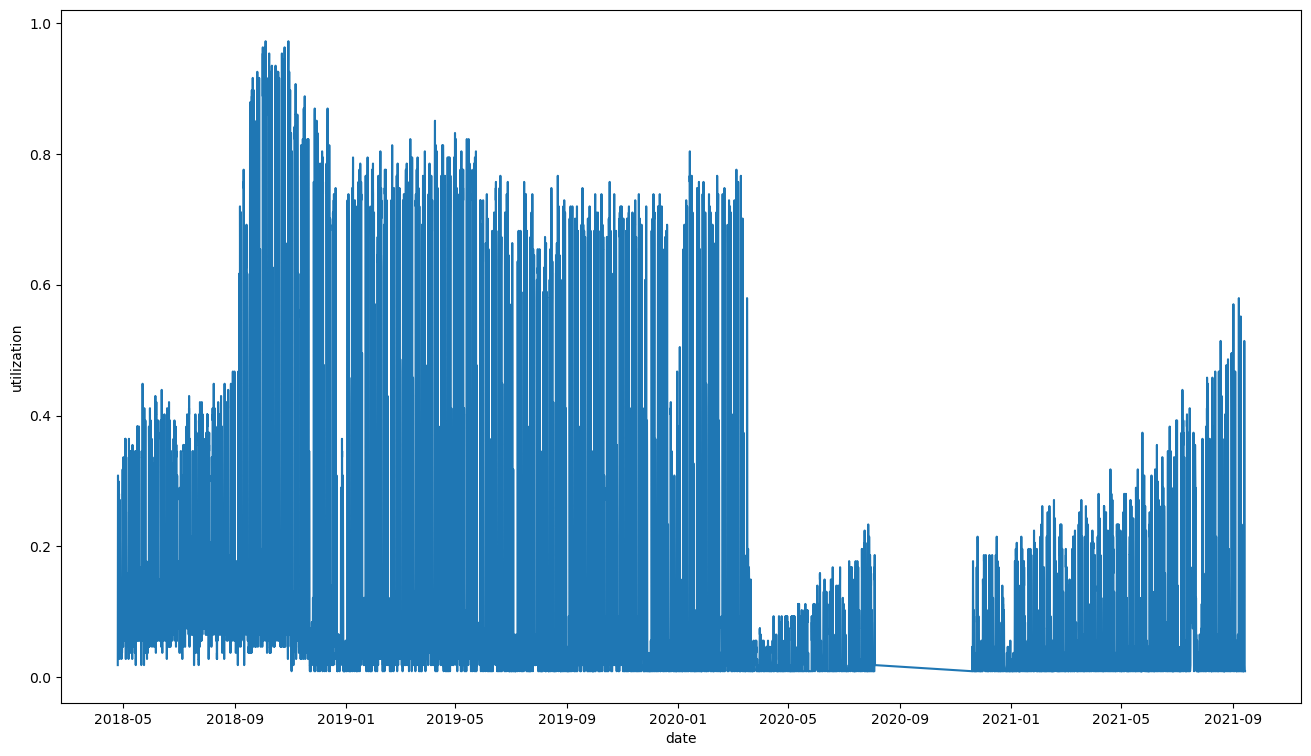

In [24]:
plt.figure(figsize=(16,9))
sns.lineplot(data=data, x="date", y="utilization")
plt.show()

In [25]:
connect=raw_data_sessions[["connectionTime"]]
disconnect=raw_data_sessions[["disconnectTime"]]

connect["count_connect"]=1
disconnect["count_disconnect"]=1

connect["connectionTime"]=connect["connectionTime"].dt.floor("1H")
disconnect["disconnectTime"]=disconnect["disconnectTime"].dt.floor("1H")

connect=connect.groupby(["connectionTime"], as_index=False).sum()
disconnect=disconnect.groupby(["disconnectTime"], as_index=False).sum()

data=data.sort_values(by="date")

data = pd.merge(data, connect, left_on='date', right_on='connectionTime', how="left")
data = pd.merge(data, disconnect, left_on='date', right_on='disconnectTime', how="left")

print(data.head(10))

                 date  utilization      connectionTime  count_connect  \
0 2018-04-25 13:00:00     0.018692 2018-04-25 13:00:00            2.0   
1 2018-04-25 14:00:00     0.065421 2018-04-25 14:00:00            5.0   
2 2018-04-25 15:00:00     0.196262 2018-04-25 15:00:00           14.0   
3 2018-04-25 16:00:00     0.271028 2018-04-25 16:00:00            8.0   
4 2018-04-25 17:00:00     0.280374 2018-04-25 17:00:00            1.0   
5 2018-04-25 18:00:00     0.299065 2018-04-25 18:00:00            2.0   
6 2018-04-25 19:00:00     0.308411 2018-04-25 19:00:00            4.0   
7 2018-04-25 20:00:00     0.289720 2018-04-25 20:00:00            2.0   
8 2018-04-25 21:00:00     0.289720                 NaT            NaN   
9 2018-04-25 22:00:00     0.299065 2018-04-25 22:00:00            2.0   

       disconnectTime  count_disconnect  
0                 NaT               NaN  
1                 NaT               NaN  
2                 NaT               NaN  
3                 NaT       

## Prepare Wheater Data

### Dealing with missing values

No missing values in the new data set

### Checking for duplicates

In [26]:
#no duplicates found
len(raw_data_wheater['time'].unique())

35064

### Convert String to DateTime format

In [27]:
raw_data_wheater['time']=pd.to_datetime(raw_data_wheater['time']).dt.tz_localize(None)

### Scan for outliers

In [28]:
def print_outliers(string_arr):
    for element in string_arr:
        mean=raw_data_wheater[element].mean()
        std=raw_data_wheater[element].std()
        z1=3* std + mean
        z2= mean - 3* std
        print(element)
        df=raw_data_wheater[[element]]
        print(df[df[element]<z2].sort_values(element))
        print(df[df[element]>z1].sort_values(element, ascending=False))

print_outliers(["temperature", "precipitation", "cloud_cover"])
# Values seem to be realistic

temperature
Empty DataFrame
Columns: [temperature]
Index: []
       temperature
23493         46.4
23494         46.2
23492         46.1
4487          45.9
23520         45.9
...            ...
32252         40.4
22966         40.3
5254          40.3
22967         40.3
23109         40.3

[66 rows x 1 columns]
precipitation
Empty DataFrame
Columns: [precipitation]
Index: []
       precipitation
7984            10.2
17384            9.5
206              9.3
9548             9.0
16697            8.1
...              ...
19271            1.2
19912            1.2
19919            1.2
26990            1.2
16857            1.2

[384 rows x 1 columns]
cloud_cover
Empty DataFrame
Columns: [cloud_cover]
Index: []
Empty DataFrame
Columns: [cloud_cover]
Index: []


## Join Wheater & Session Data

In [29]:
#join both datasets
raw_data_sessions = raw_data_sessions.sort_values(by="connectionTime")

merged_df = pd.merge_asof(raw_data_sessions, raw_data_wheater, left_on='connectionTime', right_on='time')

time=merged_df["connectionTime"]-merged_df["time"]
time.describe()

merged_df["connectionTime"].describe()

count                            60650
mean     2019-08-07 12:37:10.626875648
min                2018-04-25 13:45:10
25%      2018-11-05 15:34:24.249999872
50%         2019-05-22 03:33:30.500000
75%                2020-01-16 00:43:09
max                2021-09-14 05:43:39
Name: connectionTime, dtype: object

In [30]:
data=pd.merge_asof(data, raw_data_wheater, left_on="date", right_on="time")
print(data.head(10))

                 date  utilization      connectionTime  count_connect  \
0 2018-04-25 13:00:00     0.018692 2018-04-25 13:00:00            2.0   
1 2018-04-25 14:00:00     0.065421 2018-04-25 14:00:00            5.0   
2 2018-04-25 15:00:00     0.196262 2018-04-25 15:00:00           14.0   
3 2018-04-25 16:00:00     0.271028 2018-04-25 16:00:00            8.0   
4 2018-04-25 17:00:00     0.280374 2018-04-25 17:00:00            1.0   
5 2018-04-25 18:00:00     0.299065 2018-04-25 18:00:00            2.0   
6 2018-04-25 19:00:00     0.308411 2018-04-25 19:00:00            4.0   
7 2018-04-25 20:00:00     0.289720 2018-04-25 20:00:00            2.0   
8 2018-04-25 21:00:00     0.289720                 NaT            NaN   
9 2018-04-25 22:00:00     0.299065 2018-04-25 22:00:00            2.0   

       disconnectTime  count_disconnect                time  temperature  \
0                 NaT               NaN 2018-04-25 13:00:00         10.7   
1                 NaT               NaN 2018

# Description of Dataset

## a) Temporal Patterns and Seasonality:

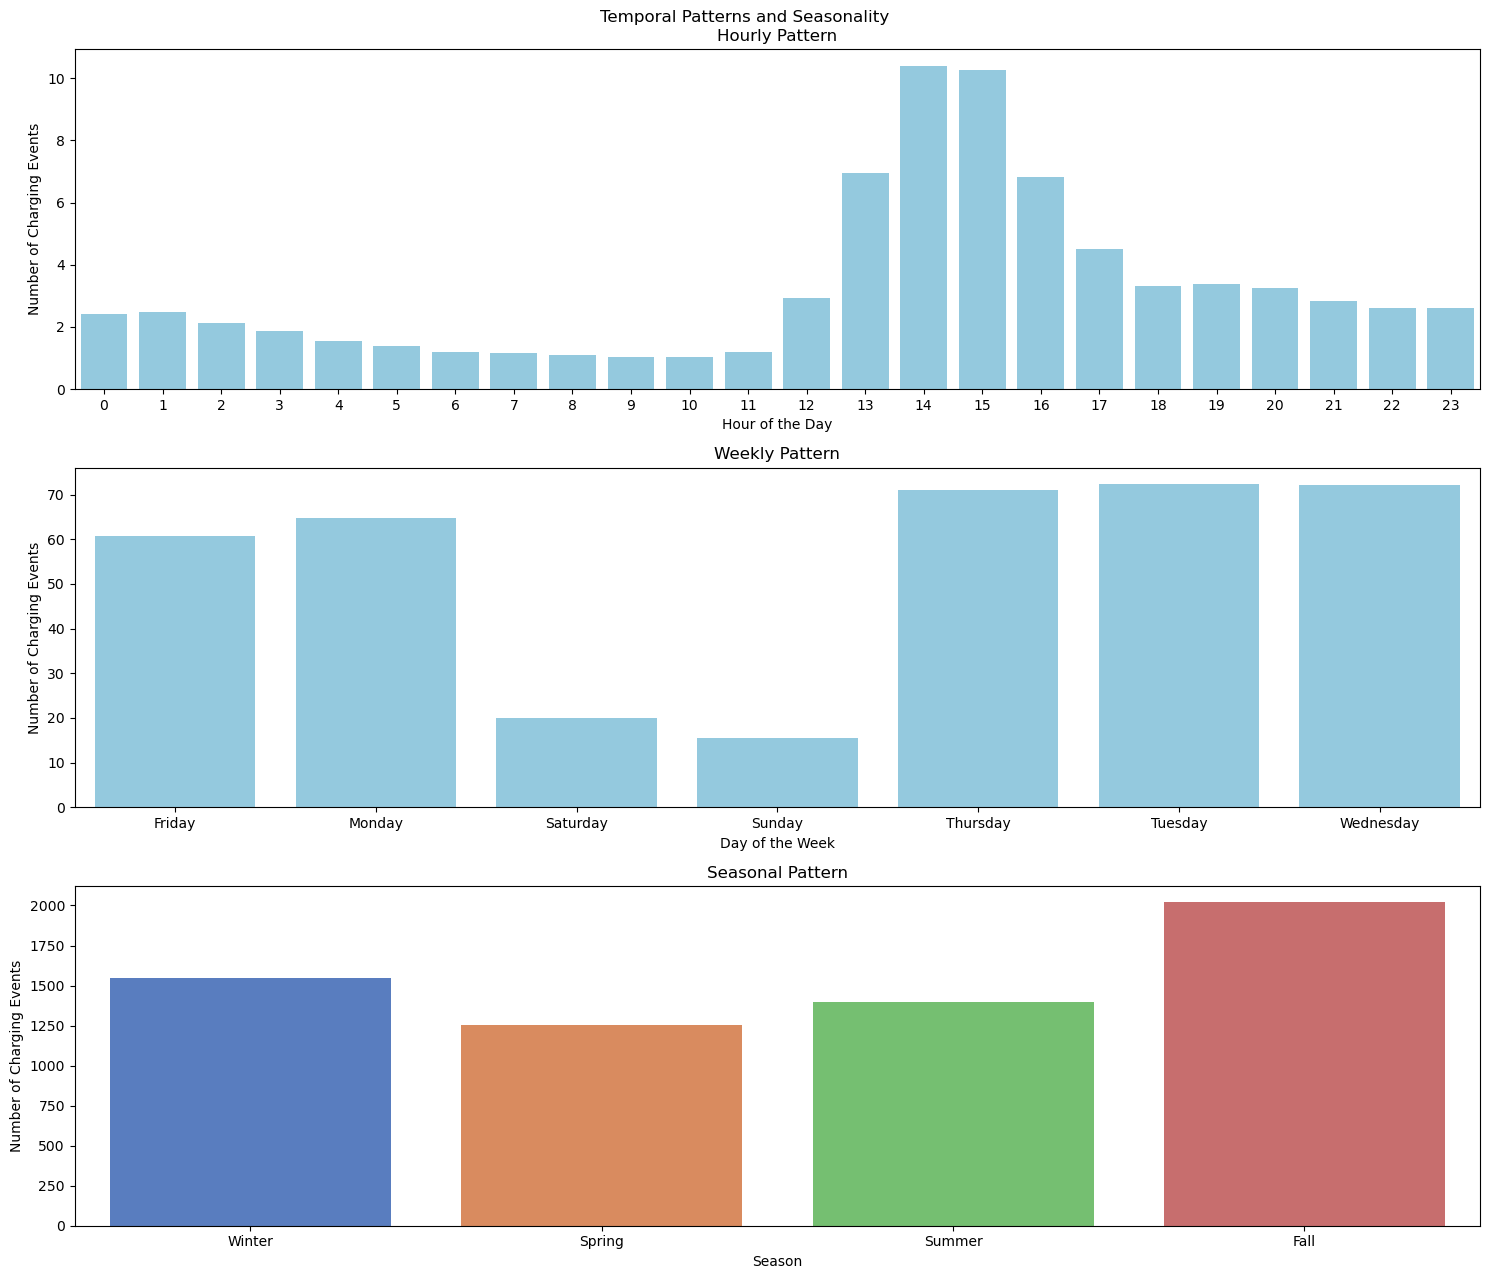

In [31]:
fig, axis = plt.subplots(3, 1, figsize=(15, 13))
fig.suptitle("Temporal Patterns and Seasonality")

merged_df['hour'] = merged_df['connectionTime'].dt.hour

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
merged_df['season'] = merged_df['connectionTime'].dt.month.apply(get_season)


#Hourly Pattern

anzahl=merged_df[["connectionTime"]]
anzahl["connectionTime"]=anzahl["connectionTime"].apply(lambda x: x.replace(second=0, minute=0))
anzahl["count_hour"]=1
anzahl=anzahl.groupby(["connectionTime"], as_index=False).sum()
anzahl["connectionTime"]=anzahl["connectionTime"].dt.hour
anzahl["count_days"]=1
anzahl=anzahl.groupby(["connectionTime"], as_index=False).sum()
anzahl["average_per_hour"]= anzahl["count_hour"]/ anzahl["count_days"]

axis[0].set_title("Hourly Pattern")
sns.barplot(x=anzahl["connectionTime"], y=anzahl["average_per_hour"], ax=axis[0], color='skyblue')
axis[0].set_xlabel('Hour of the Day')
axis[0].set_ylabel('Number of Charging Events')


#Weekly Pattern

merged_df['weekday'] = merged_df['connectionTime'].dt.day_name()

anzahl_week=merged_df[["connectionTime"]]
anzahl_week["connectionTime"]=anzahl_week["connectionTime"].apply(lambda x: x.floor('1d'))
anzahl_week["count_hour"]=1
anzahl_week=anzahl_week.groupby(["connectionTime"], as_index=False).sum()

anzahl_week["connectionTime"]=anzahl_week["connectionTime"].dt.day_name()
anzahl_week=anzahl_week.groupby(["connectionTime"], as_index=False).mean()
#anzahl_week["count_days"]=1
#anzahl_week=anzahl_week.groupby(["connectionTime"], as_index=False).sum()
#anzahl_week["average_per_weekday"]= anzahl_week["count_hour"]/ anzahl_week["count_days"]

axis[1].set_title("Weekly Pattern")
sns.barplot(x=anzahl_week['connectionTime'], y=anzahl_week['count_hour'], ax=axis[1], color='skyblue')
#axis[1].set_xticklabels([calendar.day_name[d] for d in range(7)])  # Convert day of week to day name
axis[1].set_xlabel('Day of the Week')
axis[1].set_ylabel('Number of Charging Events')

#Seasonal Pattern
anzahl_season=merged_df[["connectionTime"]]
anzahl_season["connectionTime"]=anzahl_season["connectionTime"].apply(lambda x: x.replace(second=0, minute=0, hour=0, day=1))
anzahl_season["count_hour"]=1
anzahl_season=anzahl_season.groupby(["connectionTime"], as_index=False).sum()
anzahl_season["connectionTime"]=anzahl_season['connectionTime'].dt.month.apply(get_season)
anzahl_season["count_days"]=1
anzahl_season=anzahl_season.groupby(["connectionTime"], as_index=False).sum()
anzahl_season["average_per_season"]= anzahl_season["count_hour"]/ anzahl_season["count_days"]


axis[2].set_title("Seasonal Pattern")
sns.barplot(x=anzahl_season['connectionTime'], y=anzahl_season["average_per_season"], ax=axis[2], order=['Winter', 'Spring', 'Summer', 'Fall'], palette='muted')
axis[2].set_xlabel('Season')
axis[2].set_ylabel('Number of Charging Events')

plt.tight_layout()
plt.show()

### Patterns

#### Daily
The peak number of charging sessions occur at 14 -> After Lunchbreak?
Generally morge charging events in the afternoon -> After work?
Lowest amount of charging events 0 - 12 -> people sleep at home and use their own charging station
#### Weekly
high use between Monday and Friday -> working days, connect charging with way to work, use car as transport to work -> need of charging
peak on Tuesday -> begin of the week, Office day
Monday & Friday lower compared to other working days -> Home Office days?, free for parttime workers?, no need for/at weekend
lowest level Saturday and Sunday: not in the city for working/ no long distances

#### Seasonal
more in summer: car trip to vacation location? generally more activities in summer

## b) Key Performance Indicators (KPIs):

* kWh delivered per hour
* Number of new Charging Events/hour
* Average time without charging
* utilization of charging station in percentage (Stations occupied/hour)
* utilization of charging station in percentage (charging/hour)
* Average Charging Duration per Hour of the Day
* % of registered user/hour

### kWh delivered per hour

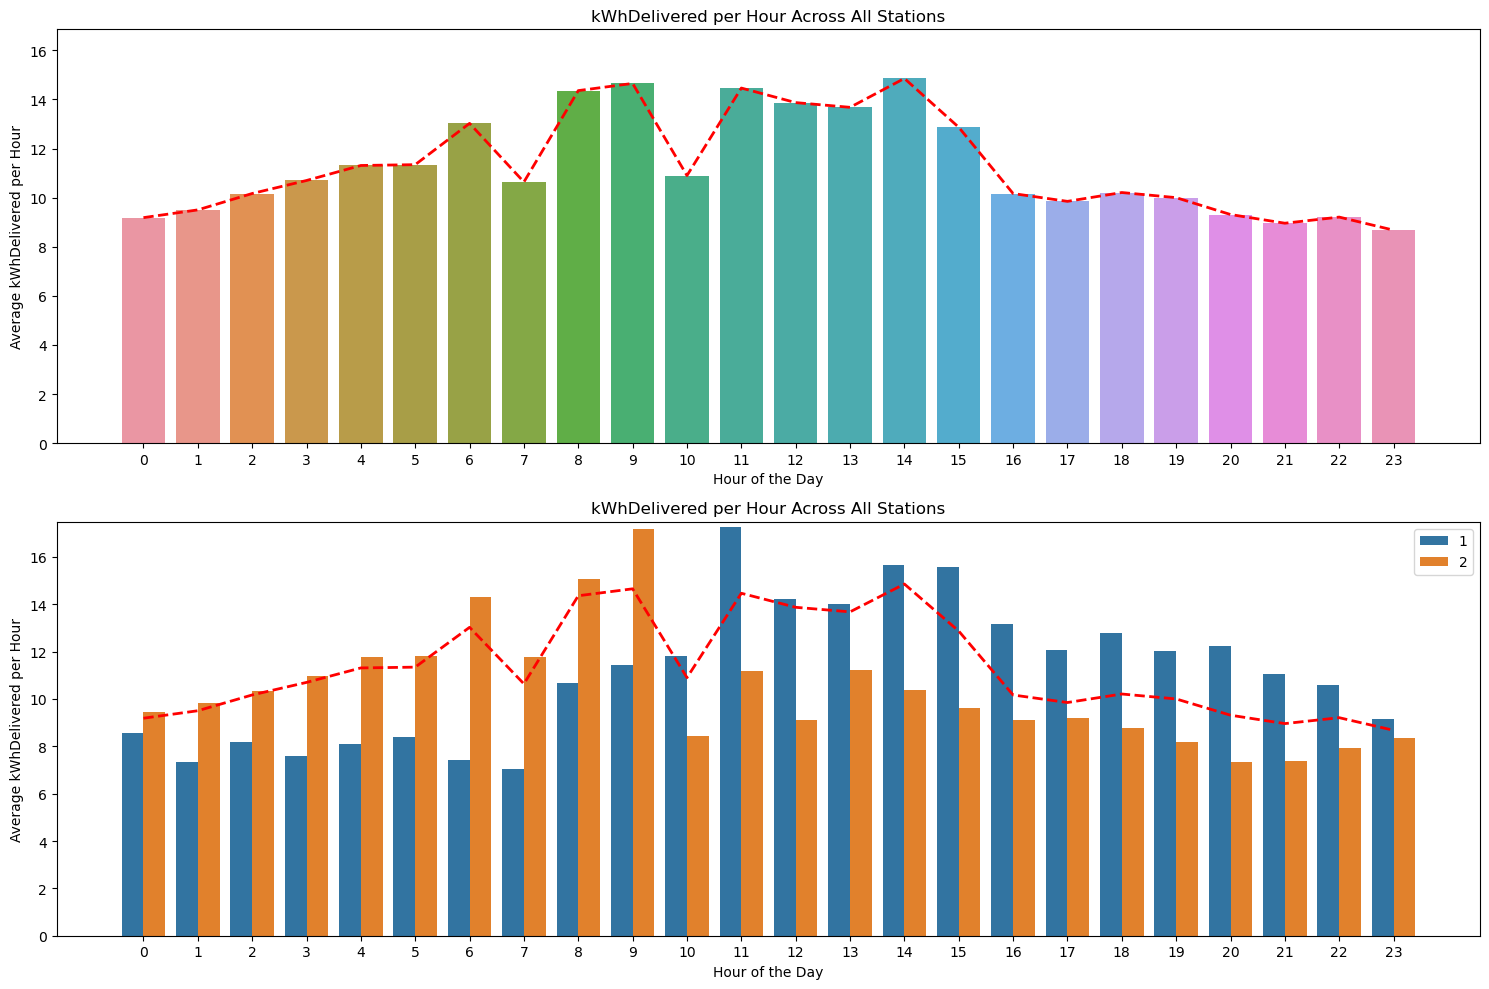

In [32]:
# Adding a new column for charging duration in hours
merged_df['connection_duration'] = (merged_df['disconnectTime'] - merged_df['connectionTime']).dt.total_seconds() / 3600

# Selecting relevant columns for utilization calculation
util_df = merged_df[['siteID', 'stationID', 'connectionTime', 'disconnectTime', 'connection_duration', 'kWhDelivered']]

# Grouping by site, station, day, and hour, and calculating utilization
util_df['connectionTime'] = util_df['connectionTime'].apply(lambda x: x.replace(second=0, minute=0))
util_df['disconnectTime'] = util_df['disconnectTime'].apply(lambda x: x.replace(second=0, minute=0))
util_df['day'] = util_df['connectionTime'].dt.date
util_df['hour'] = util_df['connectionTime'].dt.hour
util_df = util_df.groupby(['siteID', 'stationID', 'day', 'hour'], as_index=False).agg({'connection_duration': 'sum', 'kWhDelivered': 'mean'})

# Calculating average utilization percentage per hour
util_df['station_utilization'] = (util_df['connection_duration'] / util_df['connection_duration'].max()) * 100

# Grouping by hours and calculating average utilization
average_utilization = util_df.groupby('hour')['station_utilization'].mean().reset_index()

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))  # Reduced height to 10

# Plot for both sites combined
sns.barplot(x=average_utilization['hour'], y=util_df.groupby('hour')['kWhDelivered'].mean().reset_index()['kWhDelivered'], ax=axes[0]).set(title='kWhDelivered per Hour Across All Stations')
axes[0].plot(average_utilization['hour'], util_df.groupby('hour')['kWhDelivered'].mean().reset_index()['kWhDelivered'], color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average kWhDelivered per Hour')
axes[0].set_ylim(0, util_df.groupby('hour')['kWhDelivered'].mean().max() + 2)  # Adjust this value according to your requirements

# Plot by siteID
sns.barplot(x='hour', y='kWhDelivered', hue="siteID", data=util_df.astype({'siteID': str}), ci=None, ax=axes[1]).set(title='kWhDelivered per Hour Across All Stations')
sns.lineplot(x=average_utilization['hour'], y=util_df.groupby('hour')['kWhDelivered'].mean().reset_index()['kWhDelivered'], color='red', linestyle='dashed', linewidth=2, ax=axes[1])
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average kWhDelivered per Hour')
axes[1].set_ylim(0, util_df.groupby(['hour', 'siteID'])['kWhDelivered'].mean().max() + 0.2)  # Adjust this value according to your requirements

plt.tight_layout()
plt.show()

### Number of new Charging Events/hour

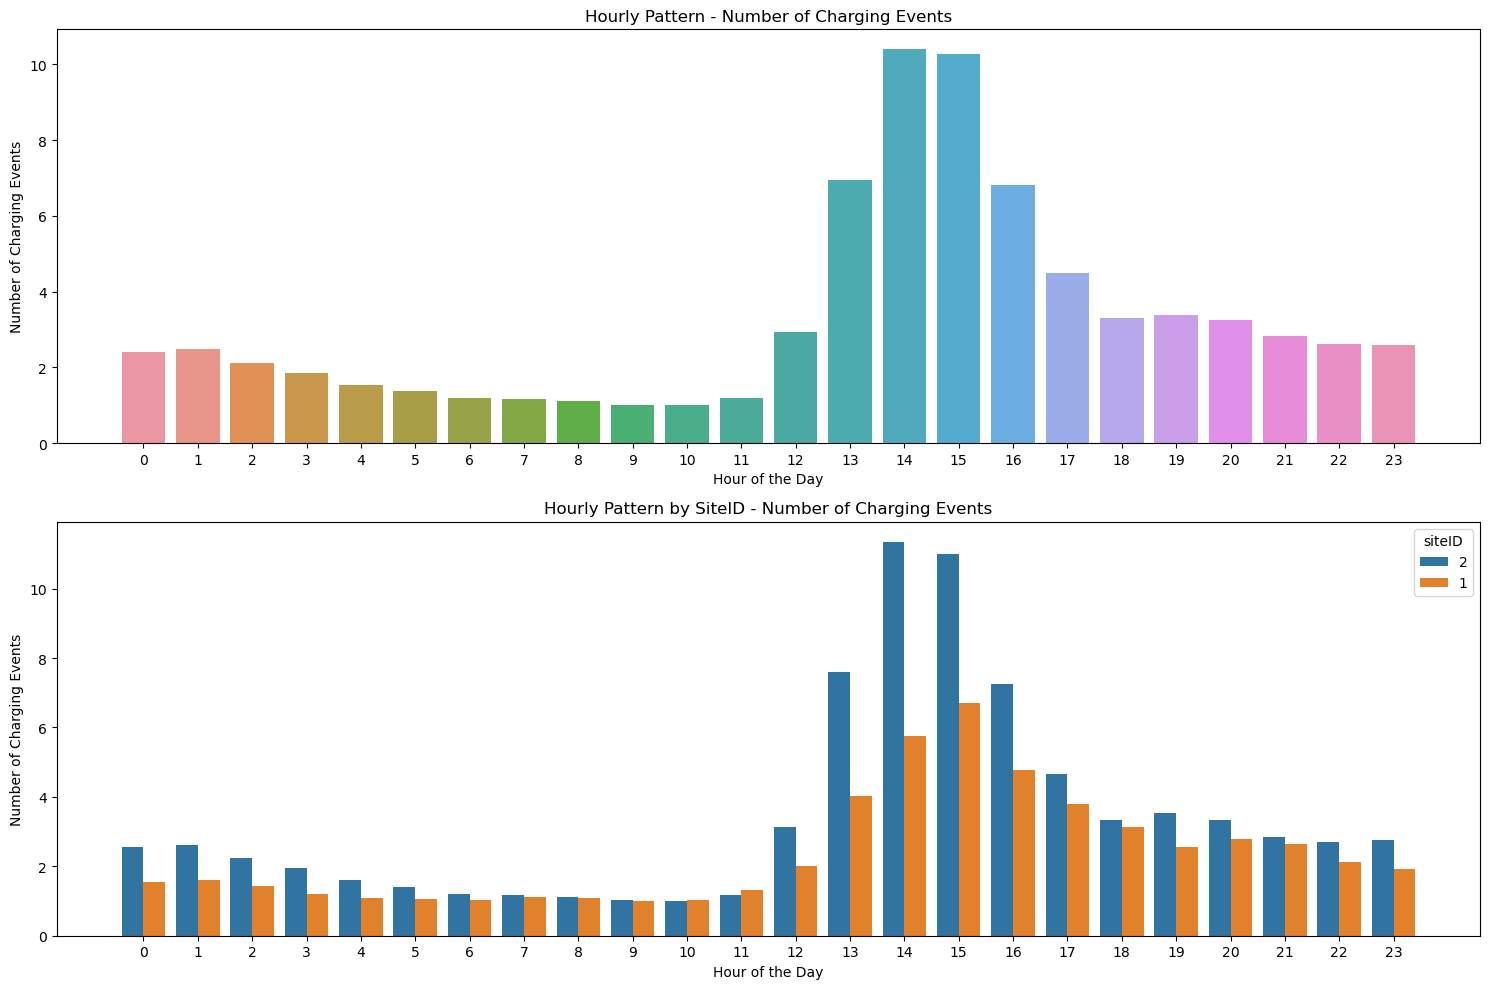

In [33]:
# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))  # Reduced height to 10

# Plot for both sites combined
number = merged_df[["connectionTime"]]
number["connectionTime"] = number["connectionTime"].apply(lambda x: x.replace(second=0, minute=0))
number["count_hour"] = 1
number = number.groupby(["connectionTime"], as_index=False).sum()
number["connectionTime"] = number["connectionTime"].dt.hour
number["count_days"] = 1
number["average_per_hour"] = number["count_hour"] / number["count_days"]

axes[0].set_title("Hourly Pattern - Number of Charging Events")
sns.barplot(x=number["connectionTime"], y=number["average_per_hour"], ax=axes[0], ci=None)
axes[0].plot(color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Charging Events')

# Plot by siteID
axes[1].set_title("Hourly Pattern by SiteID - Number of Charging Events")
sns.barplot(x=number["connectionTime"], y=number["average_per_hour"], hue="siteID", data=merged_df.astype({'siteID': str}), ax=axes[1], ci=None)
axes[1].plot(color='red', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Charging Events')

plt.tight_layout()
plt.show()

### Average time without charging

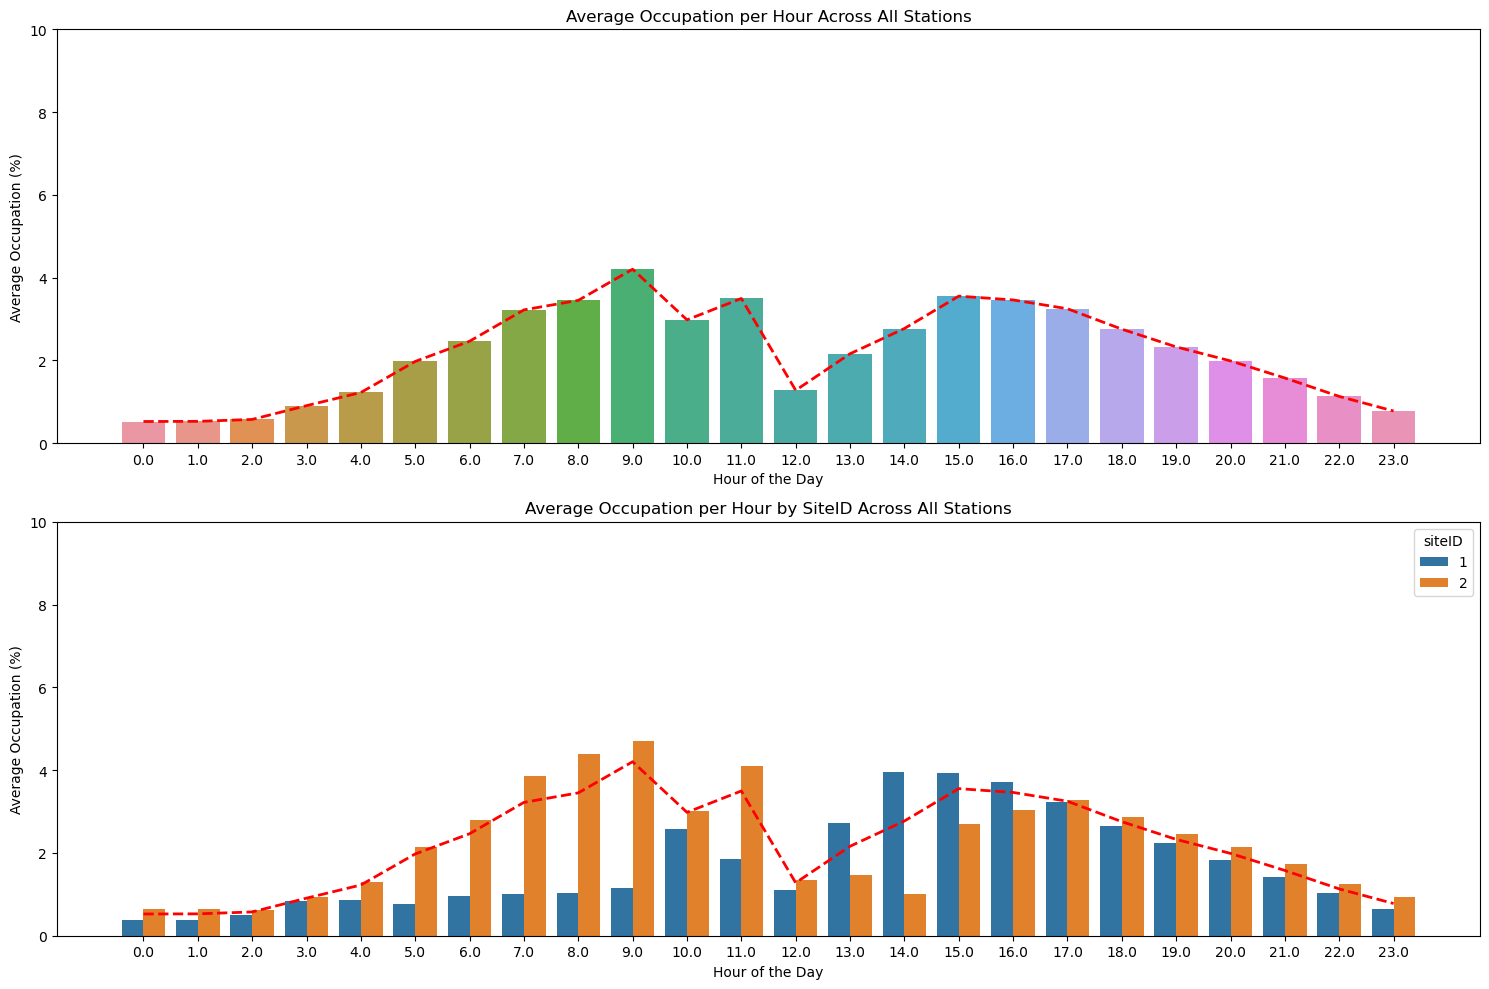

In [34]:
#Occupation Rate (how long do cars stay connected, even though they are done charging
#Calculate occupation rate in hours (exclude negative values)
merged_df['occupation_rate'] = (merged_df['disconnectTime'] - merged_df['doneChargingTime']).dt.total_seconds() / 3600
merged_df.loc[merged_df['occupation_rate'] < 0, 'occupation_rate'] = 0  # Replace negative values with 0

occ_df = merged_df[['siteID', 'stationID', 'disconnectTime', 'doneChargingTime', 'occupation_rate']]

# Grouping by site, station, day, and hour, and calculating occupation
occ_df['doneChargingTime'] = occ_df['doneChargingTime'].apply(lambda x: x.replace(second=0, minute=0))
occ_df['disconnectTime'] = occ_df['disconnectTime'].apply(lambda x: x.replace(second=0, minute=0))
occ_df['day'] = occ_df['doneChargingTime'].dt.date
occ_df['hour'] = occ_df['doneChargingTime'].dt.hour
occ_df = occ_df.groupby(['siteID', 'stationID', 'day', 'hour'], as_index=False).agg({'occupation_rate': 'sum'})

# Calculating average occupation percentage per hour
occ_df['station_occupation'] = (occ_df['occupation_rate'] / occ_df['occupation_rate'].max()) * 100

# Grouping by hours and calculating average utilization
average_occupation = occ_df.groupby('hour')['station_occupation'].mean().reset_index()

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))  # Reduced height to 10

# Plot for both sites combined
sns.barplot(x=average_occupation['hour'], y=average_occupation['station_occupation'], ax=axes[0]).set(title='Average Occupation per Hour Across All Stations')
axes[0].plot(average_occupation['hour'], average_occupation['station_occupation'], color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Occupation (%)')
axes[0].set_ylim(0, 10)  # Adjust this value according to your requirements

# Plot by siteID
sns.barplot(x='hour', y='station_occupation', hue="siteID", data=occ_df.astype({'siteID': str}), ci=None, ax=axes[1]).set(title='Average Occupation per Hour by SiteID Across All Stations')
axes[1].plot(average_occupation['hour'], average_occupation['station_occupation'], color='red', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Occupation (%)')
axes[1].set_ylim(0, 10)  # Adjust this value according to your requirements

plt.tight_layout()
plt.show()

### Utilization of charging station in percentage (Stations occuppied/hour)

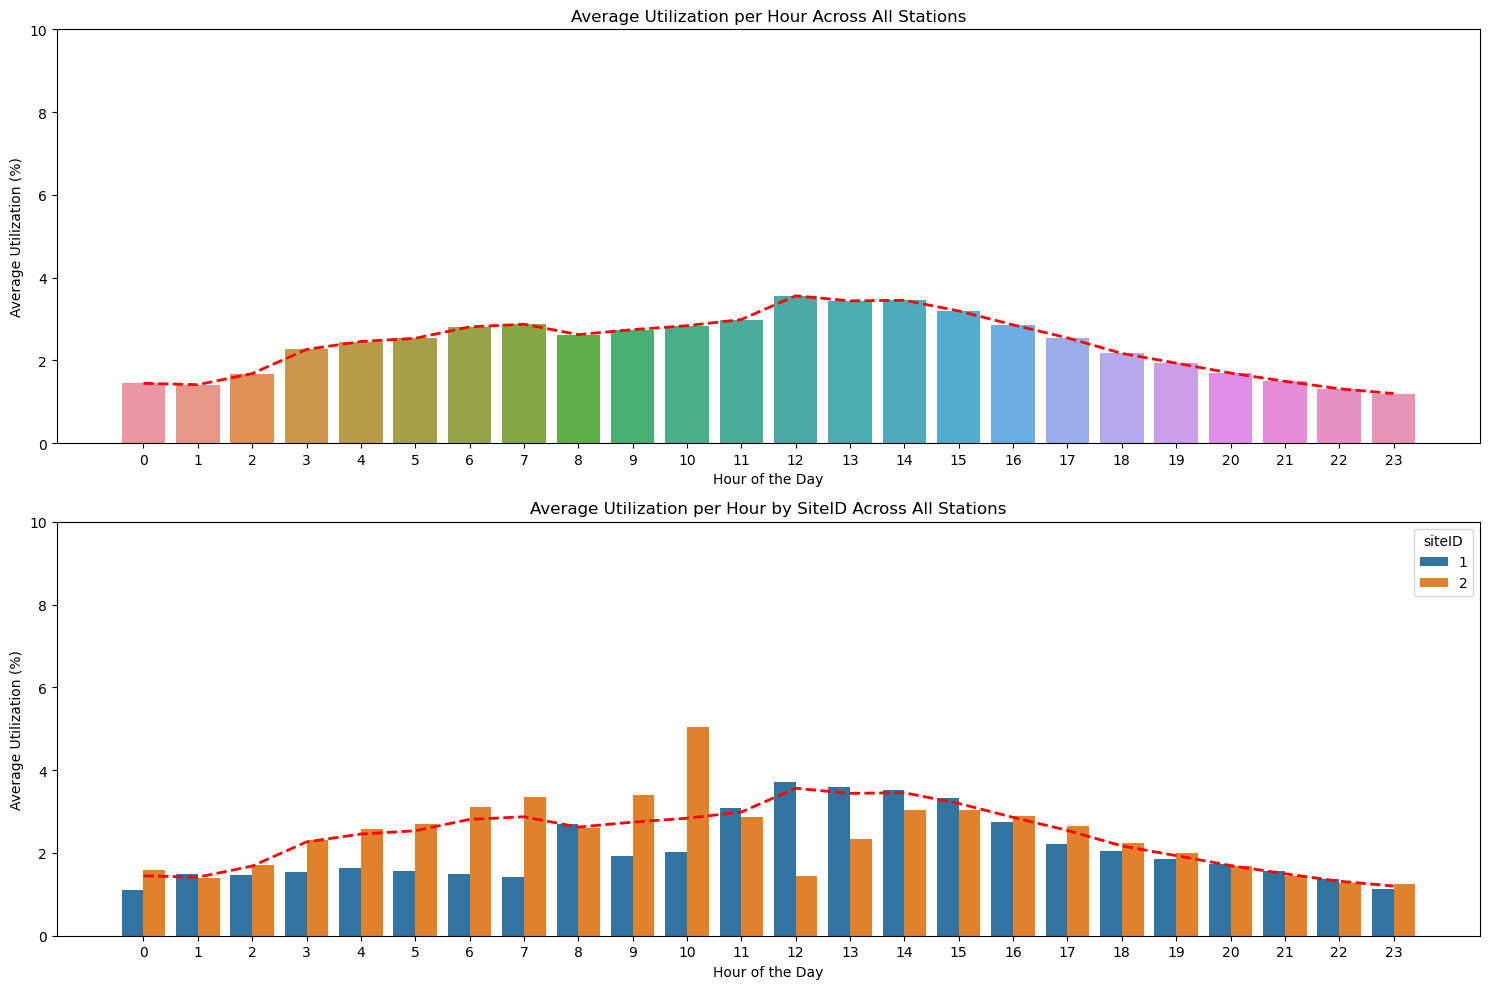

In [35]:
# Adding a new column for charging duration in hours
merged_df['connection_duration'] = (merged_df['disconnectTime'] - merged_df['connectionTime']).dt.total_seconds() / 3600

# Selecting relevant columns for utilization calculation
util_df = merged_df[['siteID', 'stationID', 'connectionTime', 'disconnectTime', 'connection_duration']]

# Grouping by site, station, day, and hour, and calculating utilization
util_df['connectionTime'] = util_df['connectionTime'].apply(lambda x: x.replace(second=0, minute=0))
util_df['disconnectTime'] = util_df['disconnectTime'].apply(lambda x: x.replace(second=0, minute=0))
util_df['day'] = util_df['connectionTime'].dt.date
util_df['hour'] = util_df['connectionTime'].dt.hour
util_df = util_df.groupby(['siteID', 'stationID', 'day', 'hour'], as_index=False).agg({'connection_duration': 'sum'})

# Calculating average utilization percentage per hour
util_df['station_utilization'] = (util_df['connection_duration'] / util_df['connection_duration'].max()) * 100

# Grouping by hours and calculating average utilization
average_utilization = util_df.groupby('hour')['station_utilization'].mean().reset_index()

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))  # Reduced height to 10

# Plot for both sites combined
sns.barplot(x=average_utilization['hour'], y=average_utilization['station_utilization'], ax=axes[0]).set(title='Average Utilization per Hour Across All Stations')
axes[0].plot(average_utilization['hour'], average_utilization['station_utilization'], color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Utilization (%)')
axes[0].set_ylim(0, 10)  # Adjust this value according to your requirements

# Plot by siteID
sns.barplot(x='hour', y='station_utilization', hue="siteID", data=util_df.astype({'siteID': str}), ci=None, ax=axes[1]).set(title='Average Utilization per Hour by SiteID Across All Stations')
axes[1].plot(average_utilization['hour'], average_utilization['station_utilization'], color='red', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Utilization (%)')
axes[1].set_ylim(0, 10)  # Adjust this value according to your requirements

plt.tight_layout()
plt.show()

### Utilization of charging station in percentage (charging/hour)

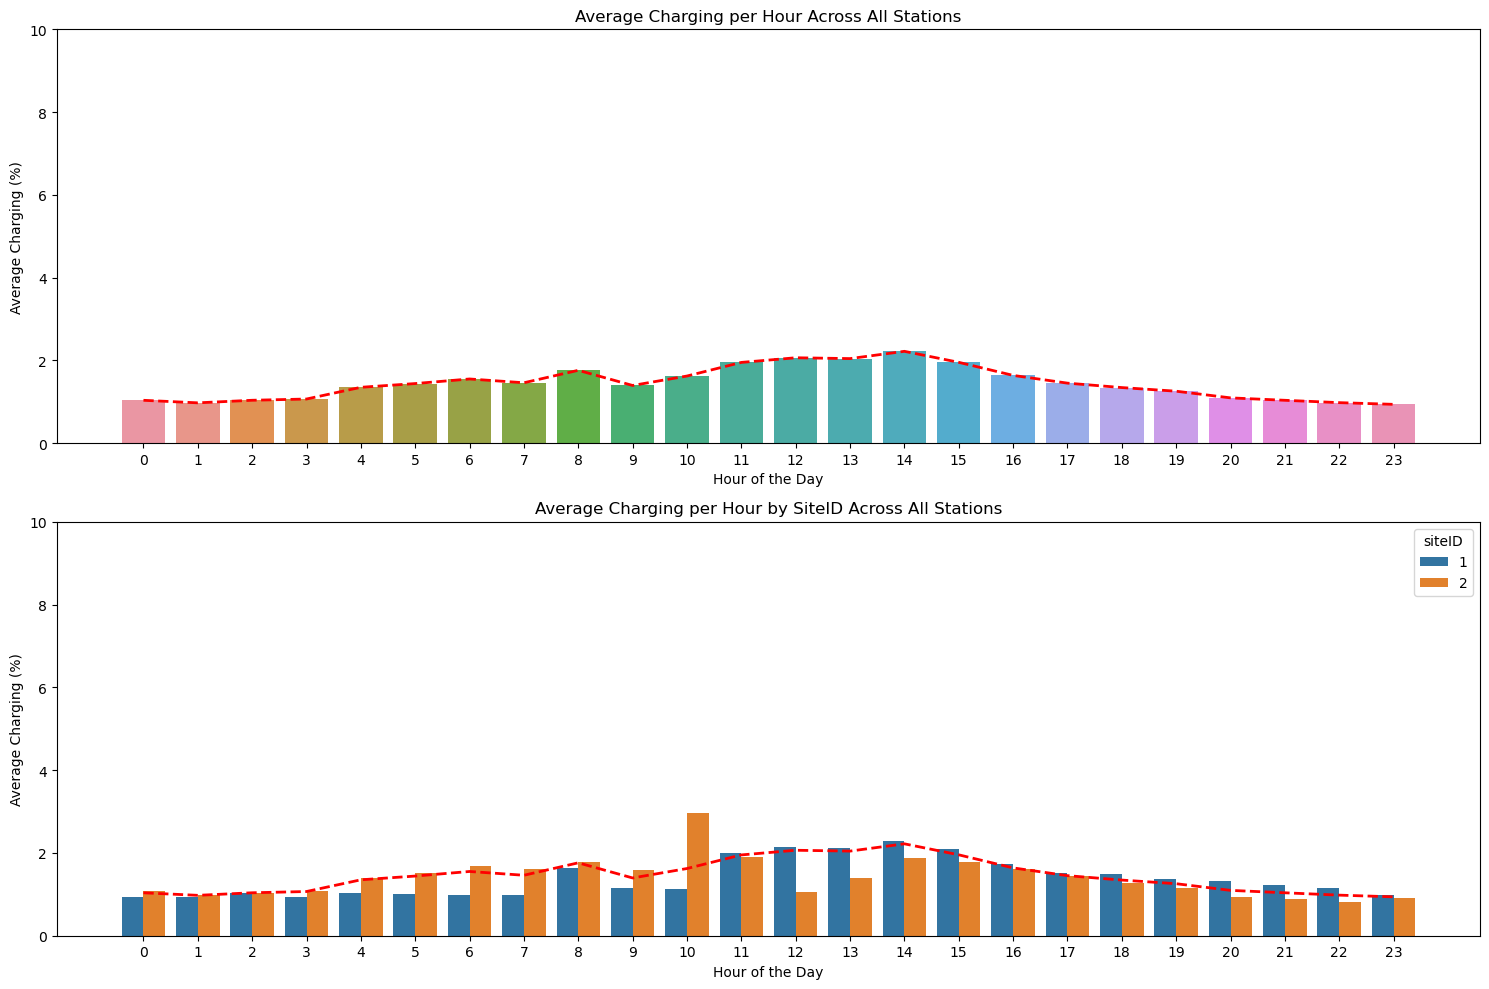

In [36]:
# Adding a new column for charging duration in hours
merged_df['charging_duration'] = (merged_df['doneChargingTime'] - merged_df['connectionTime']).dt.total_seconds() / 3600

# Selecting relevant columns for charging calculation
charg_df = merged_df[['siteID', 'stationID', 'connectionTime', 'doneChargingTime', 'charging_duration']]

# Grouping by site, station, day, and hour, and calculating charging
charg_df['connectionTime'] = charg_df['connectionTime'].apply(lambda x: x.replace(second=0, minute=0))
charg_df['doneChargingTime'] = charg_df['doneChargingTime'].apply(lambda x: x.replace(second=0, minute=0))
charg_df['day'] = charg_df['connectionTime'].dt.date
charg_df['hour'] = charg_df['connectionTime'].dt.hour
charg_df = charg_df.groupby(['siteID', 'stationID', 'day', 'hour'], as_index=False).agg({'charging_duration': 'sum'})

# Calculating average charging percentage per hour
charg_df['station_charging'] = (charg_df['charging_duration'] / charg_df['charging_duration'].max()) * 100

# Grouping by hours and calculating average charging
average_charging = charg_df.groupby('hour')['station_charging'].mean().reset_index()

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))  # Reduced height to 10

# Plot for both sites combined
sns.barplot(x=average_charging['hour'], y=average_charging['station_charging'], ax=axes[0]).set(title='Average Charging per Hour Across All Stations')
axes[0].plot(average_charging['hour'], average_charging['station_charging'], color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Charging (%)')
axes[0].set_ylim(0, 10)  # Adjust this value according to your requirements

# Plot by siteID
sns.barplot(x='hour', y='station_charging', hue="siteID", data=charg_df.astype({'siteID': str}), ci=None, ax=axes[1]).set(title='Average Charging per Hour by SiteID Across All Stations')
axes[1].plot(average_charging['hour'], average_charging['station_charging'], color='red', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Charging (%)')
axes[1].set_ylim(0, 10)  # Adjust this value according to your requirements

plt.tight_layout()
plt.show()

### Average Charging Duration per Hour of the Day 

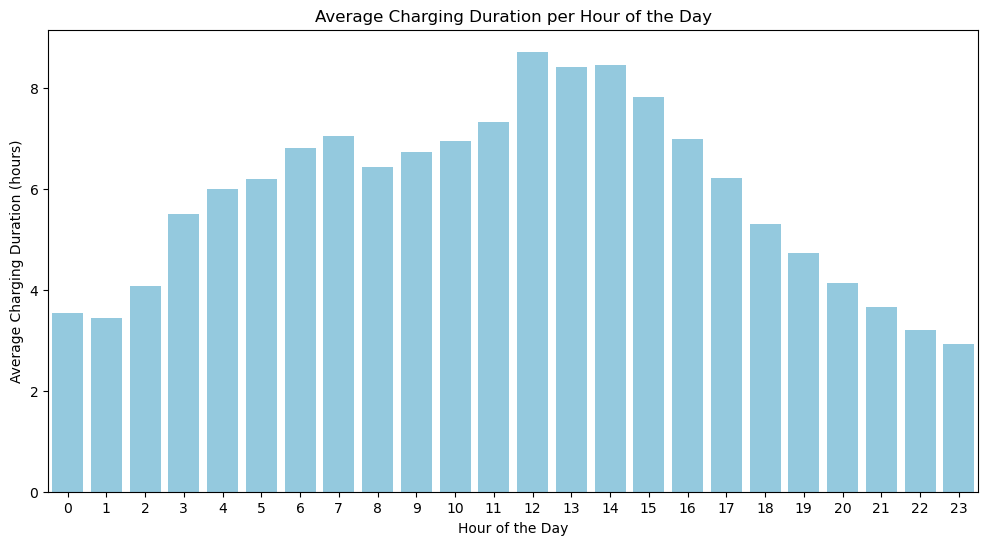

In [37]:
#Utilization rate: (average charging duration of sessions over the day)
#Calculate charging duration in hours
merged_df['charging_duration'] = (merged_df['disconnectTime'] - merged_df['connectionTime']).dt.total_seconds() / 3600

#Extract hour from 'connectionTime'
merged_df['hour'] = merged_df['connectionTime'].dt.hour

#Group by hour and calculate the average charging duration
average_charging_duration_per_hour = merged_df.groupby('hour')['charging_duration'].mean()

#Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=average_charging_duration_per_hour.index, y=average_charging_duration_per_hour.values, color='skyblue')
plt.title('Average Charging Duration per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Charging Duration (hours)')
plt.show()

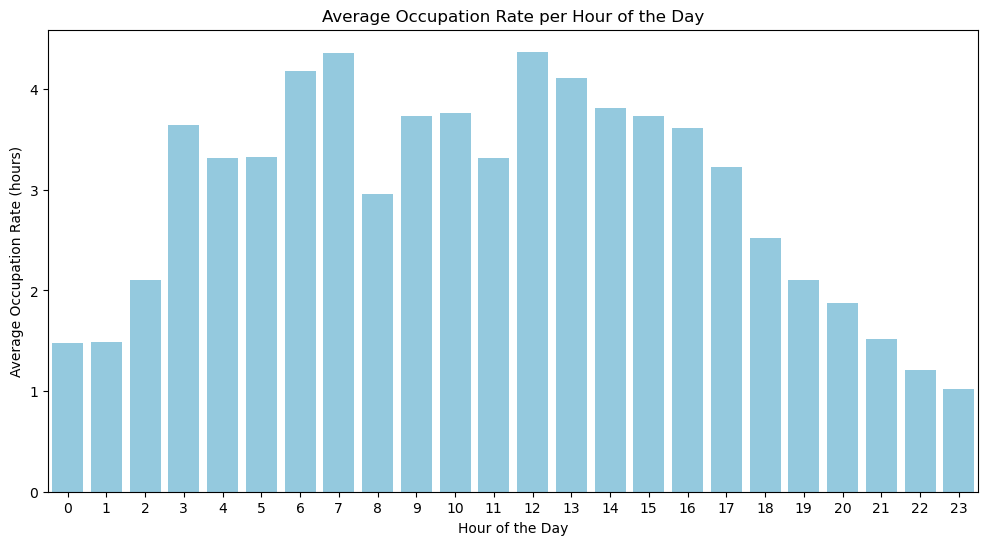

In [38]:
#Occupation Rate (how long do cars stay connected, even though they are done charging
#Calculate occupation rate in hours (exclude negative values)
merged_df['occupation_rate'] = (merged_df['disconnectTime'] - merged_df['doneChargingTime']).dt.total_seconds() / 3600
merged_df.loc[merged_df['occupation_rate'] < 0, 'occupation_rate'] = 0  # Replace negative values with 0

#Extract hour from 'connectionTime'
merged_df['hour'] = merged_df['connectionTime'].dt.hour

#Group by hour and calculate the average occupation rate
average_occupation_rate_per_hour = merged_df.groupby('hour')['occupation_rate'].mean()

#Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=average_occupation_rate_per_hour.index, y=average_occupation_rate_per_hour.values, color='skyblue')
plt.title('Average Occupation Rate per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Occupation Rate (hours)')
plt.show()

### % of registered users/hour

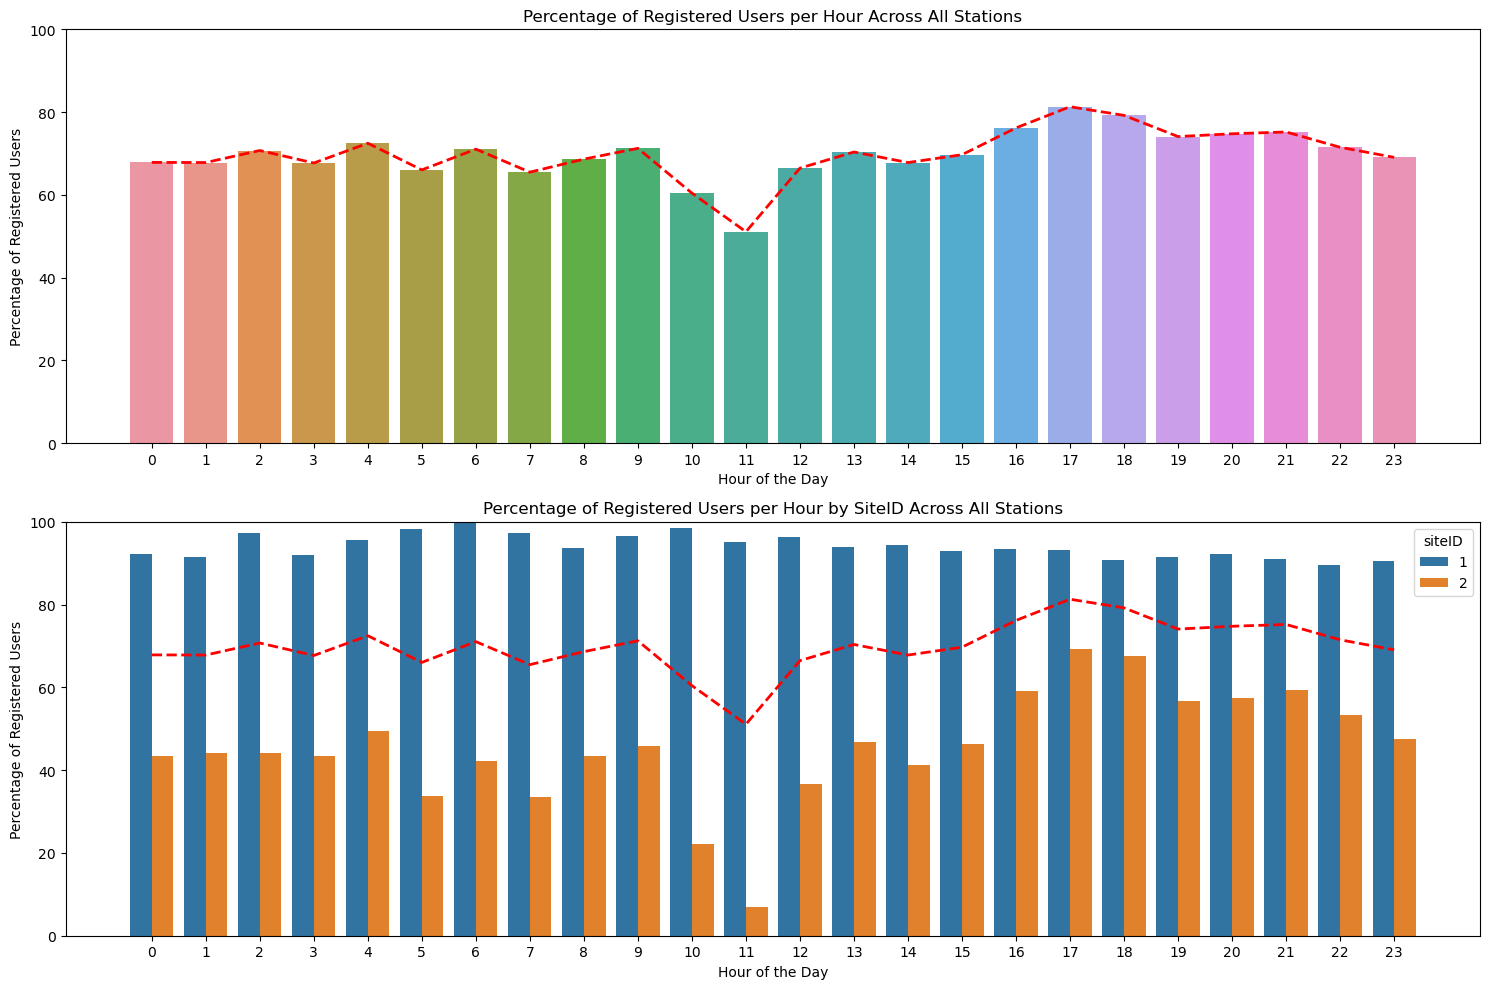

In [39]:
# Counting registered users per hour
registered_users_df = merged_df[['connectionTime', 'userID', 'siteID']].copy()
registered_users_df['hour'] = registered_users_df['connectionTime'].dt.hour
registered_users_df['is_registered'] = ~registered_users_df['userID'].isna()


# Grouping by hours and siteID, and calculating percentage of registered users
registered_users_summary = registered_users_df.groupby(['hour', 'siteID'])['is_registered'].mean() * 100
registered_users_summary = registered_users_summary.reset_index()
average_registered_users = registered_users_summary.groupby('hour')['is_registered'].mean().reset_index()

# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))  # Reduced height to 10

# Plot for all stations combined
sns.barplot(x=registered_users_summary['hour'], y=registered_users_summary['is_registered'], ax=axes[0], ci=None).set(title='Percentage of Registered Users per Hour Across All Stations')
axes[0].plot(average_registered_users['hour'], average_registered_users['is_registered'], color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Percentage of Registered Users')
axes[0].set_ylim(0, 100)  # Adjust this value according to your requirements

# Plot by siteID
sns.barplot(x='hour', y='is_registered', hue="siteID", data=registered_users_summary.astype({'siteID': str}), ci=None, ax=axes[1]).set(title='Percentage of Registered Users per Hour by SiteID Across All Stations')
axes[1].plot(average_registered_users['hour'], average_registered_users['is_registered'], color='red', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Percentage of Registered Users')
axes[1].set_ylim(0, 100)  # Adjust this value according to your requirements

plt.tight_layout()
plt.show()

## c) Site Characteristics:

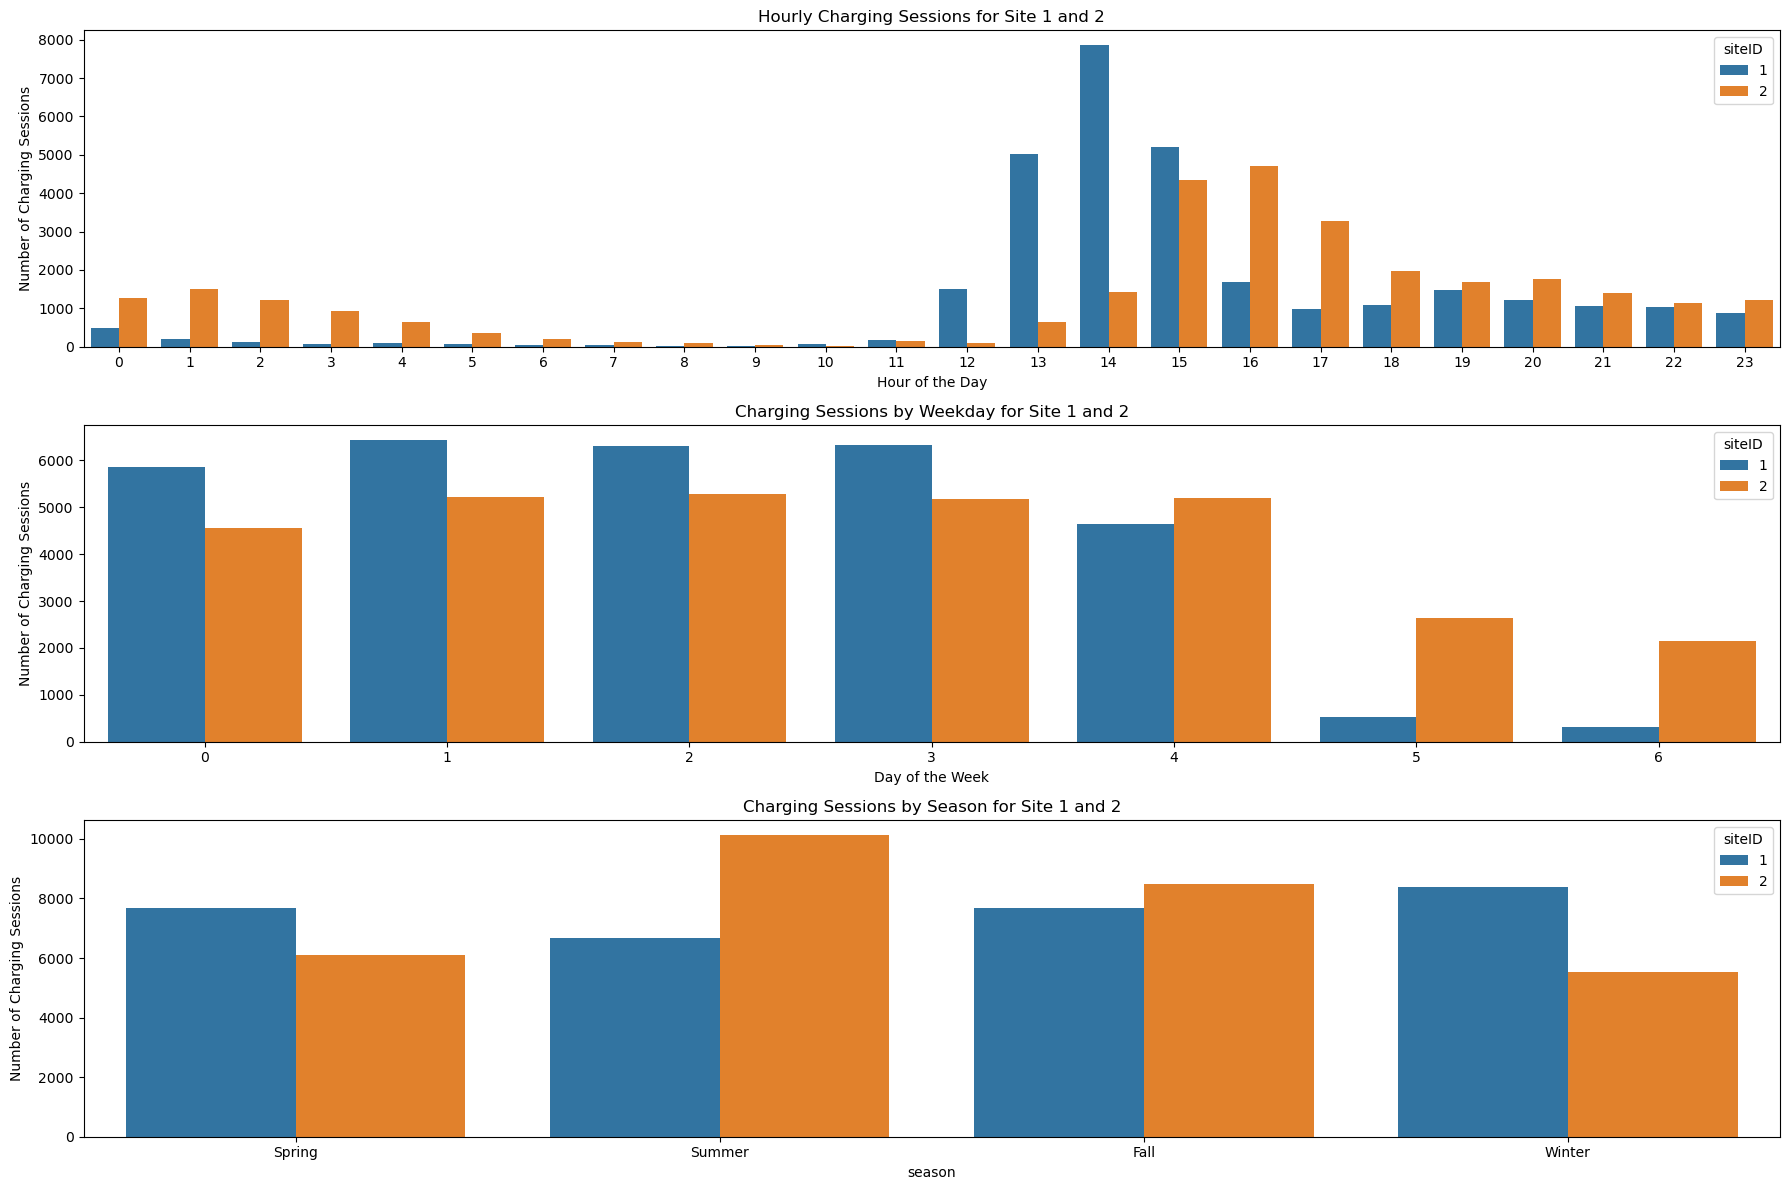

In [40]:
merged_df["siteID"] = merged_df["siteID"].astype(str)

#Create a bar plot for hours
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.countplot(x='hour', data=merged_df, hue="siteID", hue_order=["1", "2"])
plt.title('Hourly Charging Sessions for Site 1 and 2')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')

#Create a bar plot for weekdays
plt.subplot(3, 1, 2)
sns.countplot(x=merged_df['connectionTime'].dt.dayofweek, data=merged_df,  hue="siteID", hue_order=["1", "2"])
plt.title('Charging Sessions by Weekday for Site 1 and 2')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Charging Sessions')

#Create a bar plot for seasons
plt.subplot(3, 1, 3)
sns.countplot(x='season', data=merged_df,  hue="siteID", hue_order=["1", "2"])
plt.title('Charging Sessions by Season for Site 1 and 2')
plt.xlabel('season')
plt.ylabel('Number of Charging Sessions')

plt.tight_layout()
plt.show()

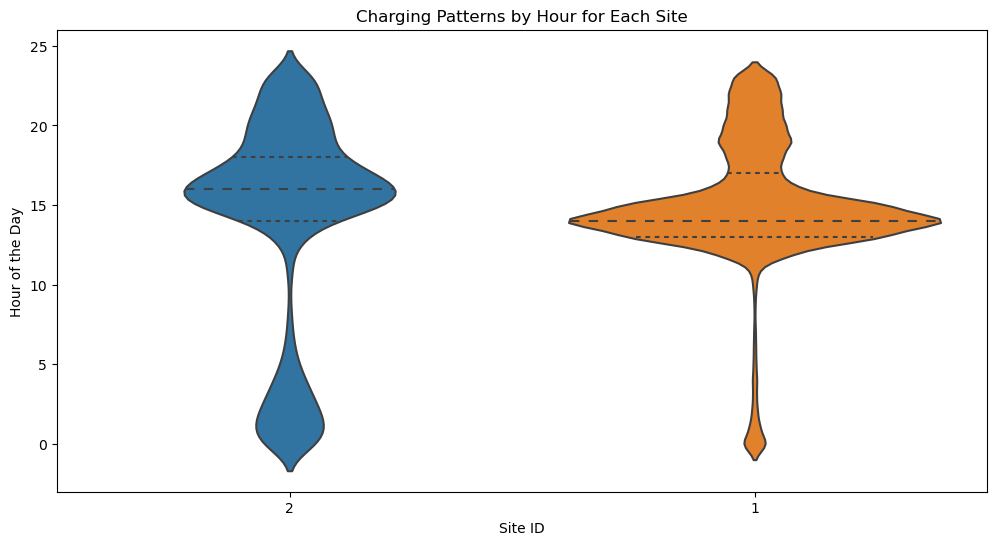

In [41]:
#At which hour did they charge:

#Create a violin plot:
#the width of the plot at each hour represents the density of charging events during that specific hour
plt.figure(figsize=(12, 6))
sns.violinplot(x='siteID', y='hour', data=merged_df, inner='quartile')
plt.title('Charging Patterns by Hour for Each Site')
plt.xlabel('Site ID')
plt.ylabel('Hour of the Day')
plt.show()

## Evaluation

### Hourly Charging Sessions:
- **Site 1** has the highest charging sessions **around midday** (12PM to 3PM). 
    - could be indicative of a **private charging** site where people charge their vehicles during working hours
- **Site 2** experiences high charging sessions during **late afternoon to early evening** (3PM to 6PM).
    - students probably wont have the financial means to buy the expensive electric vehicles, leaving the public university sites mostly unused during the typical 'working hours' in which students visit the university (7AM to 2PM)
    - as soon as full-time working employees (who have the financial resources to buy electric vehicles) come back from their workplaces in the late afternoon, they may begin charging at the public site until the next morning
    - these observations indicate Site 2 to be the **public site**

### Charging Sessions by Weekday:
- Both **Site 1** and **Site 2** show a relatively even distribution of charging sessions across weekdays (Monday to Friday).
- However, **Site 2** still has relatively **high charging sessions on the weekend** while Site 1 has significantly less during this time
    - since **employees typically don't work on the weekends**, they also dont have the chance to charge their vehicle at the companys charging sites. it therefore indicates that **Site 1** is the **private charging site**
    - **Site 2** on the other hand still has **high charging sessions on the weekend**, meaning that its usage is not constrained by any factors as much. This indicates that it is the constantly accessible **public charging site** 

### Charging Sessions by Season:
- Both sites show similar seasonal patterns.
- However, **Site 2** has **more charging sessions during the Summer**. 
- The reason for the difference might be that **Summer is the most popular vacation season**, leading to the **abscence of many employees** during this time. This means that less employees can charge their electric vehicles which would be consistent with the hypothesis that **Site 1** is the **private site**.

### Hypothesis:
 - **Site 1** = private charging site
 - **Site 2** = public charging site

# Cluster Analysis

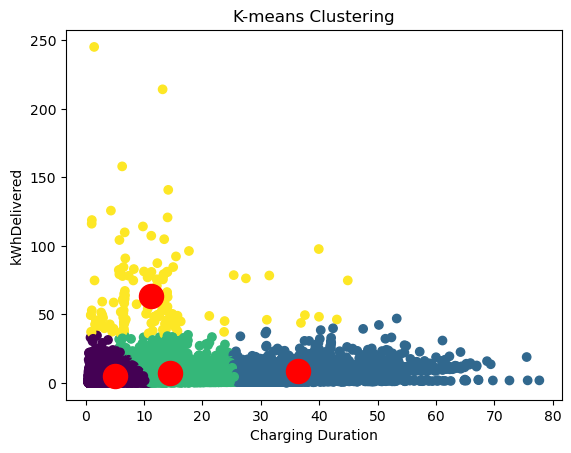

In [42]:
X = merged_df[['kWhDelivered', 'charging_duration']].dropna()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
X['cluster'] = kmeans.labels_

plt.scatter(X['kWhDelivered'], X['charging_duration'], c=X['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')  
plt.title('K-means Clustering')
plt.xlabel('Charging Duration')
plt.ylabel('kWhDelivered')
plt.show()

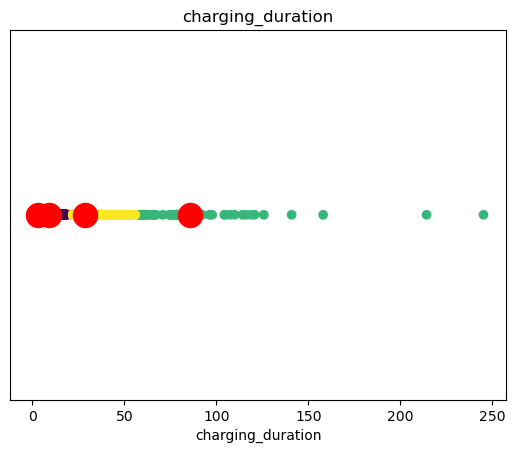

In [43]:
# Assuming merged_df contains your data
X = merged_df[['charging_duration']].dropna()

# Specify the number of clusters
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Add the cluster labels to your DataFrame
X['cluster'] = kmeans.labels_

# Plot the results
plt.scatter(X['charging_duration'], [0] * len(X), c=X['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * n_clusters, s=300, c='red')
plt.title('charging_duration')
plt.xlabel('charging_duration')
plt.yticks([])  # Hide y-axis as it's not meaningful with a single variable
plt.show()

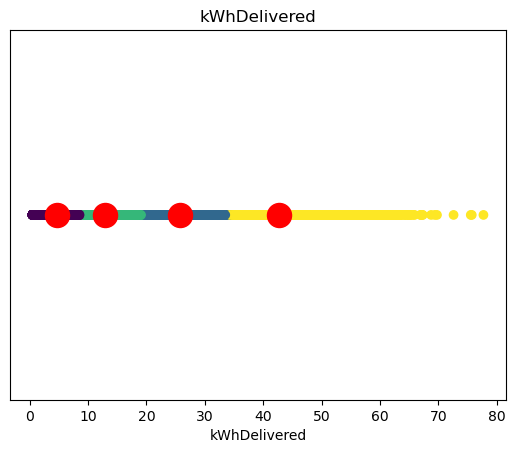

In [44]:
# Assuming merged_df contains your data
X = merged_df[['kWhDelivered']].dropna()

# Specify the number of clusters
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Add the cluster labels to your DataFrame
X['cluster'] = kmeans.labels_

# Plot the results
plt.scatter(X['kWhDelivered'], [0] * len(X), c=X['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * n_clusters, s=300, c='red')
plt.title('kWhDelivered')
plt.xlabel('kWhDelivered')
plt.yticks([])  # Hide y-axis as it's not meaningful with a single variable
plt.show()

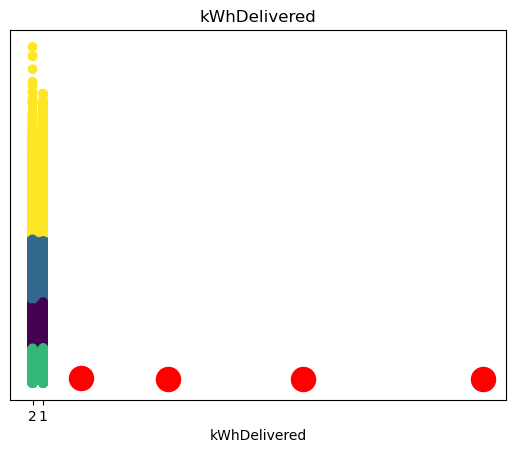

In [45]:
# Assuming merged_df contains your data
X = merged_df[['kWhDelivered','siteID']].dropna()

# Specify the number of clusters
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Add the cluster labels to your DataFrame
X['cluster'] = kmeans.labels_

# Plot the results
plt.scatter(X['siteID'], X['kWhDelivered'], c=X['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red') 
plt.title('kWhDelivered')
plt.xlabel('kWhDelivered')
plt.yticks([])  # Hide y-axis as it's not meaningful with a single variable
plt.show()

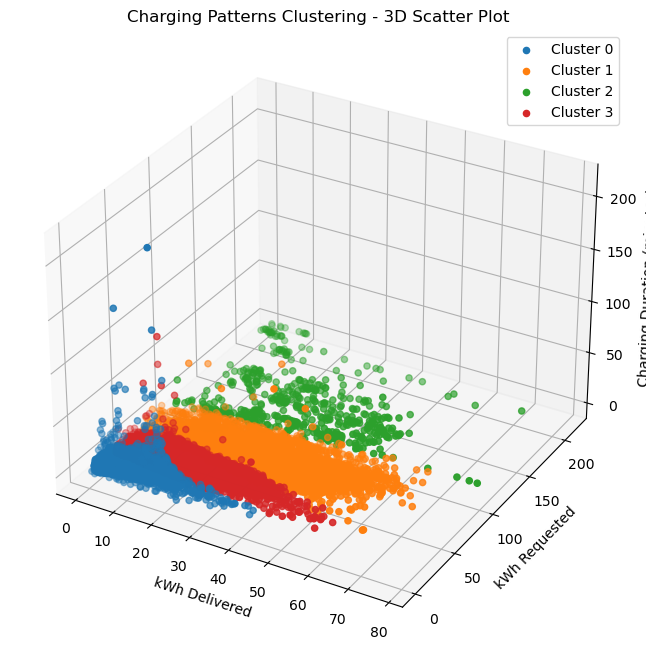

In [46]:
X = merged_df[['charging_duration', 'kWhDelivered', 'kWhRequested']].dropna()

# Specify the number of clusters
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X[['charging_duration', 'kWhDelivered', 'kWhRequested']])

# Add the cluster labels to your DataFrame
X['cluster'] = kmeans.labels_

# Enable inline plotting for matplotlib in Jupyter
%matplotlib inline

# Create a 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with points colored by cluster label
for i in range(n_clusters):
    cluster_points = X[X['cluster'] == i]
    ax.scatter(cluster_points['kWhDelivered'], cluster_points['kWhRequested'], cluster_points['charging_duration'], label=f'Cluster {i}')

# Set labels
ax.set_xlabel('kWh Delivered')
ax.set_ylabel('kWh Requested')
ax.set_zlabel('Charging Duration (minutes)')

# Add a legend
ax.legend()

plt.title('Charging Patterns Clustering - 3D Scatter Plot')
plt.show()

# Utilization Prediction

## Feature Selection & Feature Engineering

In [47]:
features=data[["date","utilization", "count_connect", "count_disconnect", "temperature", "precipitation", "cloud_cover"]]
features["weekday"]=features["date"].dt.weekday
features["hour"]=features["date"].dt.hour
features["month"]=features["date"].dt.month
print(features.head(15))

                  date  utilization  count_connect  count_disconnect  \
0  2018-04-25 13:00:00     0.018692            2.0               NaN   
1  2018-04-25 14:00:00     0.065421            5.0               NaN   
2  2018-04-25 15:00:00     0.196262           14.0               NaN   
3  2018-04-25 16:00:00     0.271028            8.0               NaN   
4  2018-04-25 17:00:00     0.280374            1.0               NaN   
5  2018-04-25 18:00:00     0.299065            2.0               3.0   
6  2018-04-25 19:00:00     0.308411            4.0               4.0   
7  2018-04-25 20:00:00     0.289720            2.0               NaN   
8  2018-04-25 21:00:00     0.289720            NaN               1.0   
9  2018-04-25 22:00:00     0.299065            2.0               1.0   
10 2018-04-25 23:00:00     0.289720            NaN               9.0   
11 2018-04-26 00:00:00     0.242991            4.0              14.0   
12 2018-04-26 01:00:00     0.149533            4.0              

In [48]:
features.describe()

date   utilization  count_connect  \
count                          23710  23710.000000   14590.000000   
mean   2019-11-04 19:36:30.822437632      0.177485       4.156957   
min              2018-04-25 13:00:00      0.009346       1.000000   
25%              2018-12-29 02:15:00      0.028037       1.000000   
50%              2019-09-10 12:30:00      0.074766       2.000000   
75%              2020-07-29 00:45:00      0.233645       5.000000   
max              2021-09-14 14:00:00      0.971963      45.000000   
std                              NaN      0.224662       5.102047   

       count_disconnect   temperature  precipitation   cloud_cover  \
count      14298.000000  23710.000000   23710.000000  23710.000000   
mean           4.241852     18.958507       0.041404     25.051202   
min            1.000000      0.700000       0.000000      0.000000   
25%            1.000000     13.600000       0.000000      0.000000   
50%            2.000000     18.100000       0.000000      7.000000   
75%            5.000000     23.600000       0.000000     34.000000   
max           43.000000     45.900000      10.200000    100.000000   
std            5.369574      7.139364       0.313736     33.765364   

            weekday          hour         month  
count  23710.000000  23710.000000  23710.000000  
mean       2.955757     11.845761      6.316111  
min        0.000000      0.000000      1.000000  
25%        1.000000      5.000000      4.000000  
50%        3.000000     13.000000      6.000000  
75%        5.000000     18.000000      9.000000  
max        6.000000     23.000000     12.000000  
std        1.977611      7.161016      3.306300

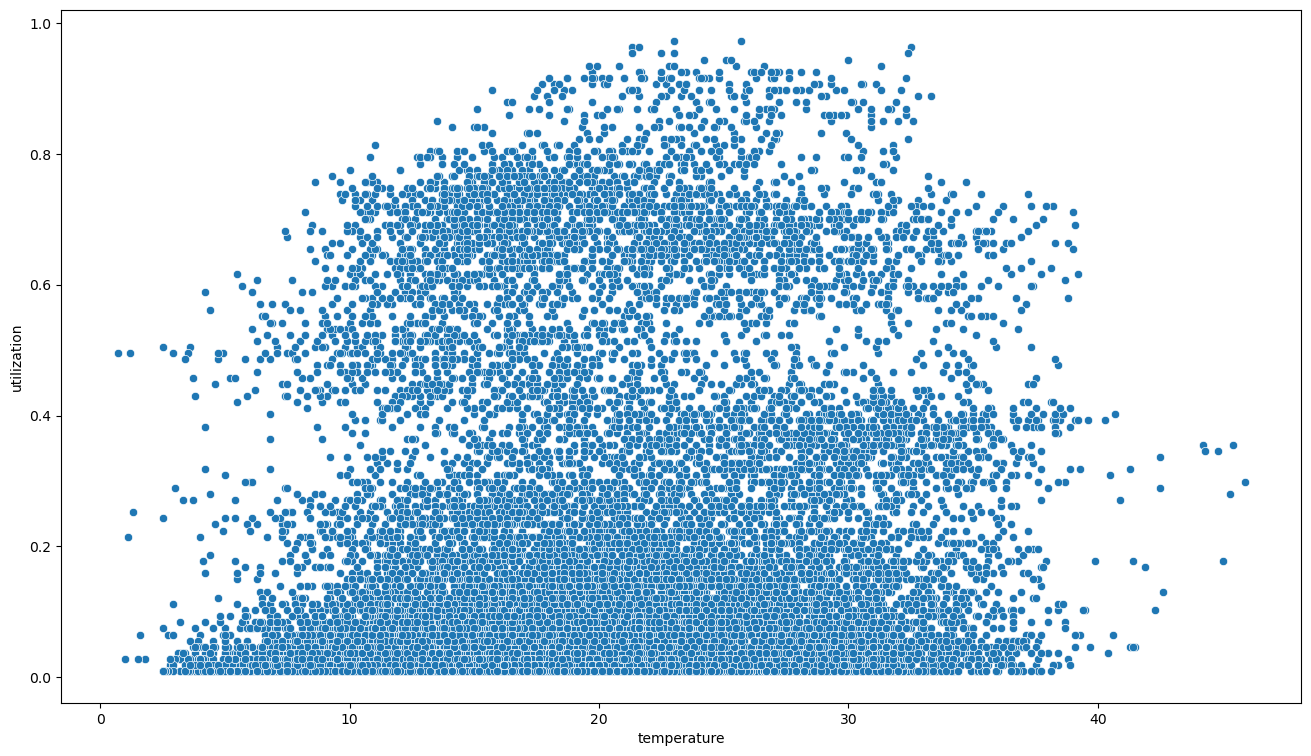

In [49]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=features, x="temperature", y="utilization", )
plt.show()

In [50]:
features["temperature"].mean()

18.958506959088993

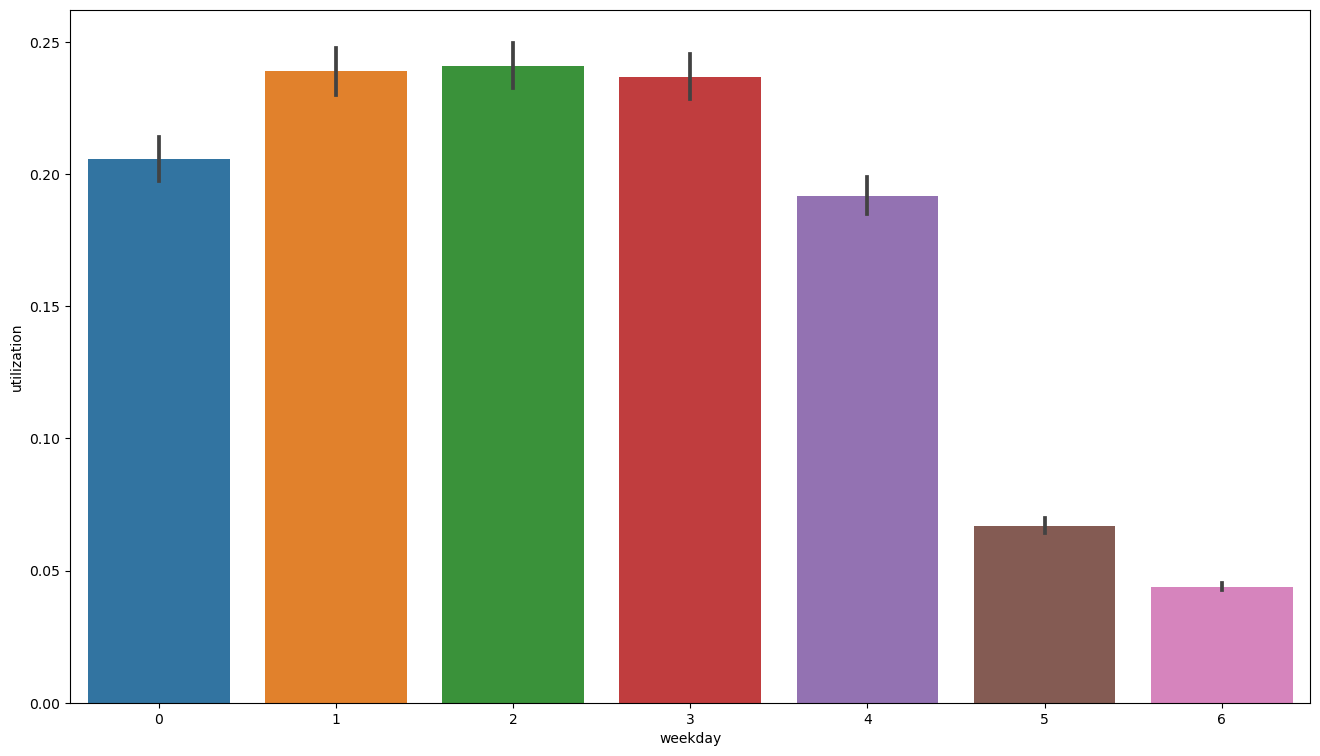

In [51]:
plt.figure(figsize=(16,9))
sns.barplot(data=features, x="weekday", y="utilization")
plt.show()

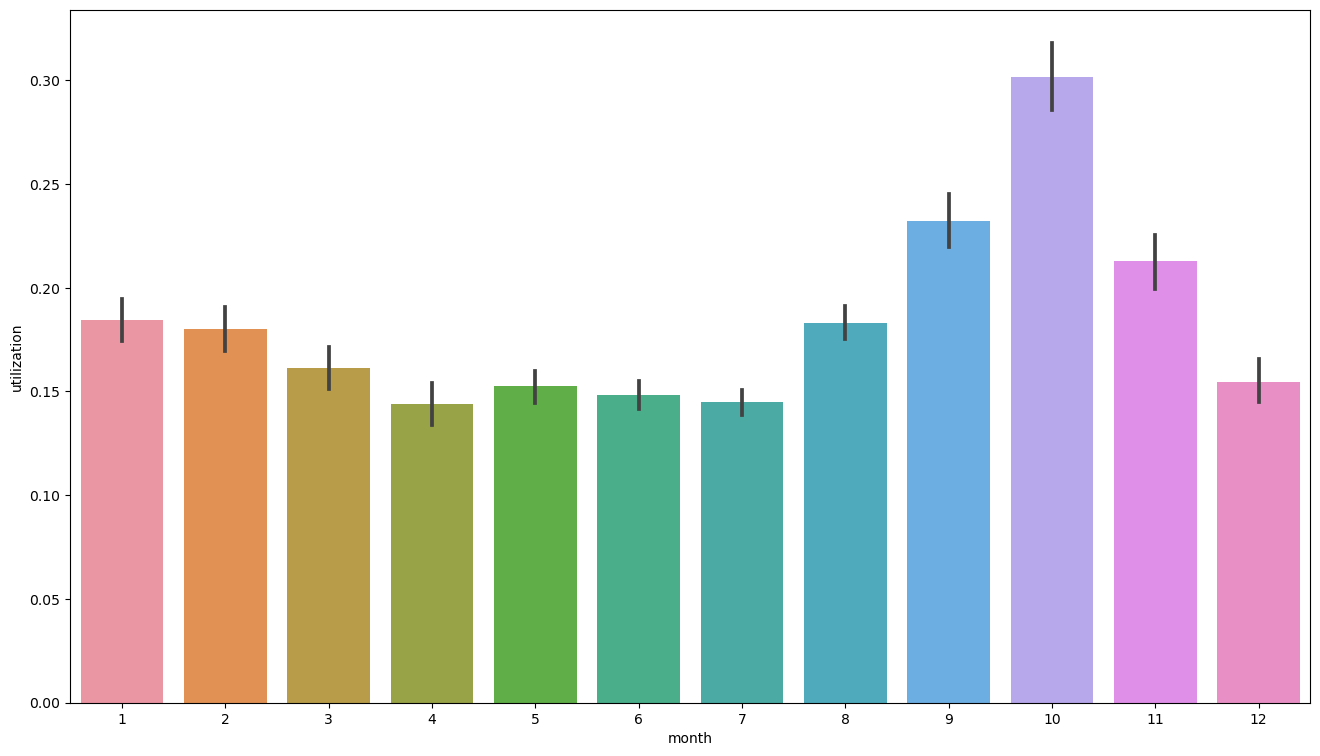

In [52]:
plt.figure(figsize=(16,9))
sns.barplot(data=features, x="month", y="utilization")
plt.show()

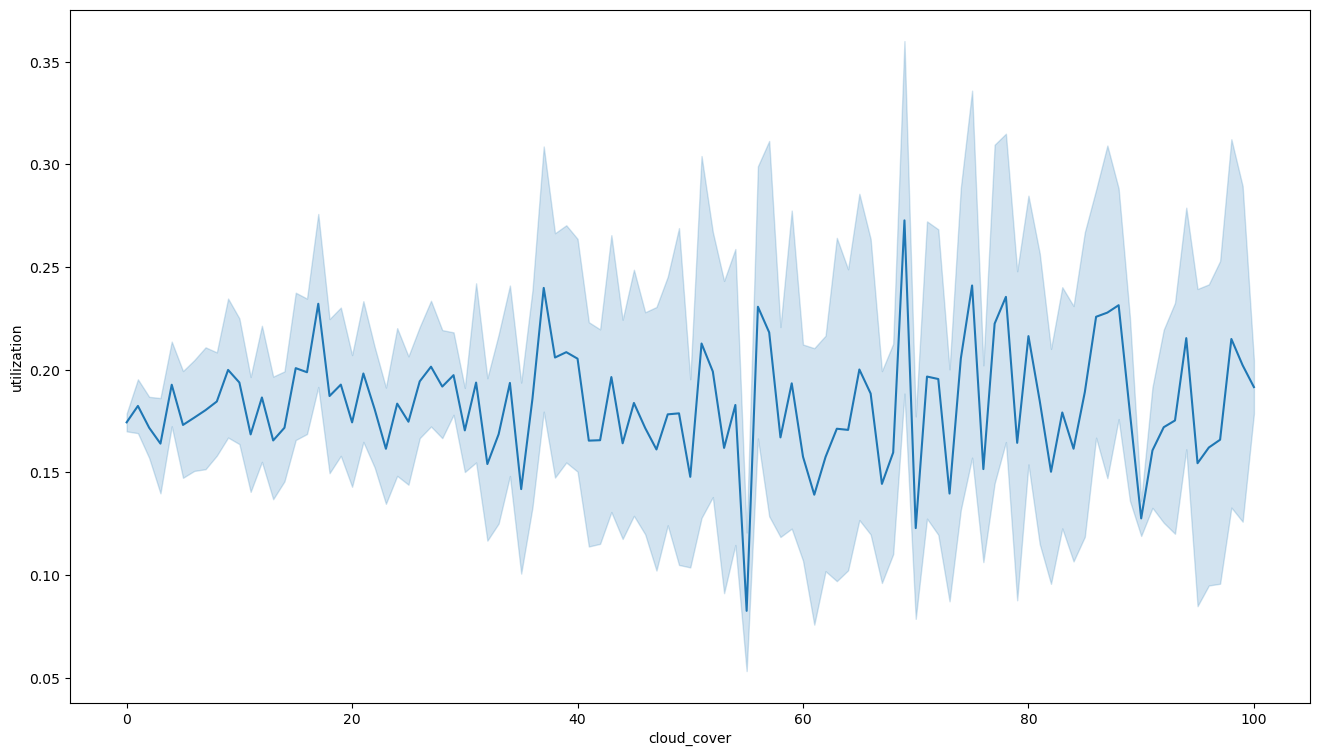

In [53]:
plt.figure(figsize=(16,9))
sns.lineplot(data=features, x="cloud_cover", y="utilization")
plt.show()

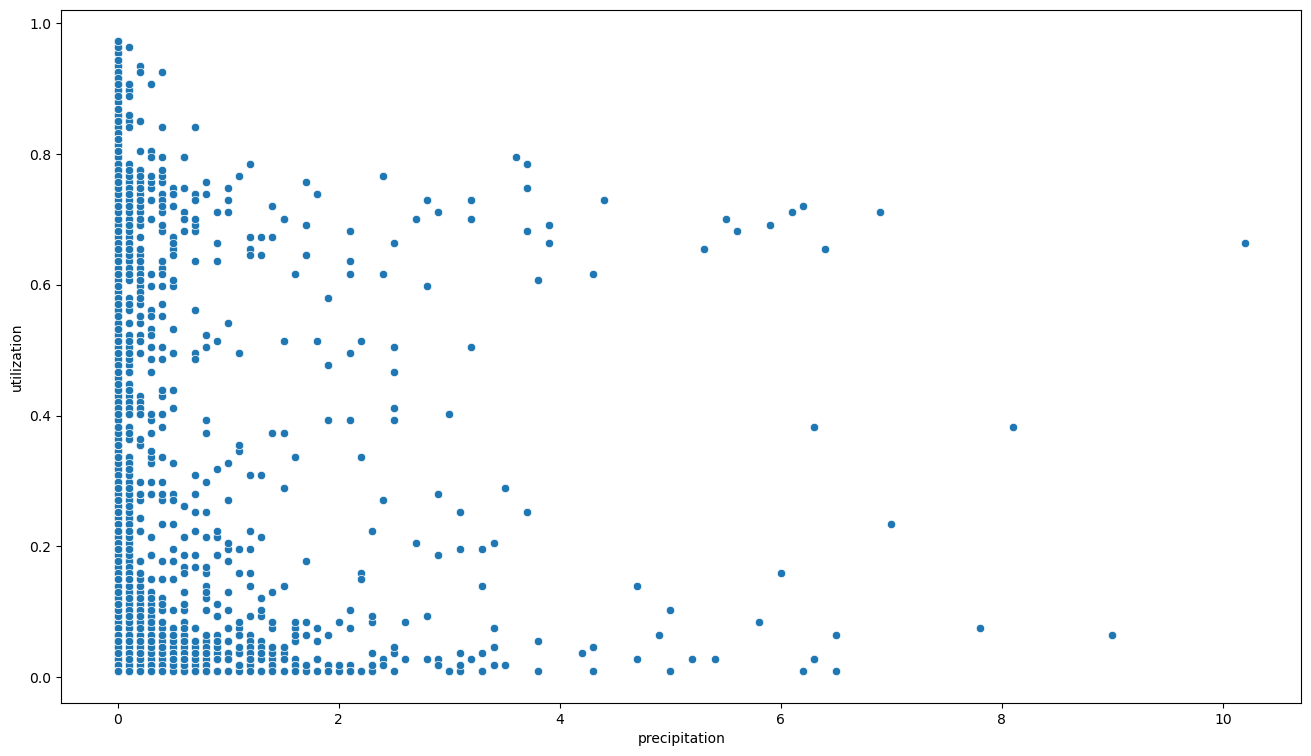

In [54]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=features, x="precipitation", y="utilization")
plt.show()

In [55]:
features["precipitation"].mean()

0.041404470687473646

### lagged time feature 1 week

In [56]:
#takes number of charging events from the prior week
#for entries with pair from last week (first week, missing data) -> mean value of the dataset
mean_hour=features[["hour", "utilization"]].groupby("hour").mean()
def lagged(x):
    if(x > datetime.strptime("2018-05-01 13:00:00", "%Y-%m-%d %H:%M:%S")):
        x=x-timedelta(days=7)
        if features.loc[features["date"]==x].empty:
            lagged_x=mean_hour.values[x.hour][0]
        else:
        
            lagged_x=features.loc[features["date"]==x].iloc[0]['utilization']
            #print(features.loc[features["connectionTime"]==x].iloc[0]['charging_events'])
    else:    
        lagged_x=mean_hour.values[x.hour][0]
    return lagged_x
features["lagged_week"]=features["date"].apply(lambda x: lagged(x))

In [57]:
print(features["lagged_week"].head(40))

0     0.089195
1     0.165501
2     0.238959
3     0.285926
4     0.312892
5     0.328287
6     0.334227
7     0.334167
8     0.331488
9     0.323437
10    0.298327
11    0.238215
12    0.159435
13    0.100307
14    0.070395
15    0.053249
16    0.043604
17    0.036411
18    0.032716
19    0.030637
20    0.029218
21    0.028634
22    0.029203
23    0.040887
24    0.089195
25    0.165501
26    0.238959
27    0.285926
28    0.312892
29    0.328287
30    0.334227
31    0.334167
32    0.331488
33    0.323437
34    0.298327
35    0.238215
36    0.159435
37    0.100307
38    0.070395
39    0.053249
Name: lagged_week, dtype: float64


### lagged time feature 1 hour

In [58]:
def lagged_hour(index):
    if(index==0):
        return 0
    else:
        return features[["utilization"]].iloc[index-1].values[0]


features["lagged_hour"]=features.apply(lambda x: lagged_hour(x.name), axis=1)
print(features.head(10))

                 date  utilization  count_connect  count_disconnect  \
0 2018-04-25 13:00:00     0.018692            2.0               NaN   
1 2018-04-25 14:00:00     0.065421            5.0               NaN   
2 2018-04-25 15:00:00     0.196262           14.0               NaN   
3 2018-04-25 16:00:00     0.271028            8.0               NaN   
4 2018-04-25 17:00:00     0.280374            1.0               NaN   
5 2018-04-25 18:00:00     0.299065            2.0               3.0   
6 2018-04-25 19:00:00     0.308411            4.0               4.0   
7 2018-04-25 20:00:00     0.289720            2.0               NaN   
8 2018-04-25 21:00:00     0.289720            NaN               1.0   
9 2018-04-25 22:00:00     0.299065            2.0               1.0   

   temperature  precipitation  cloud_cover  weekday  hour  month  lagged_week  \
0         10.7            0.0          100        2    13      4     0.089195   
1         10.7            0.0          100        2    1

### corona feature

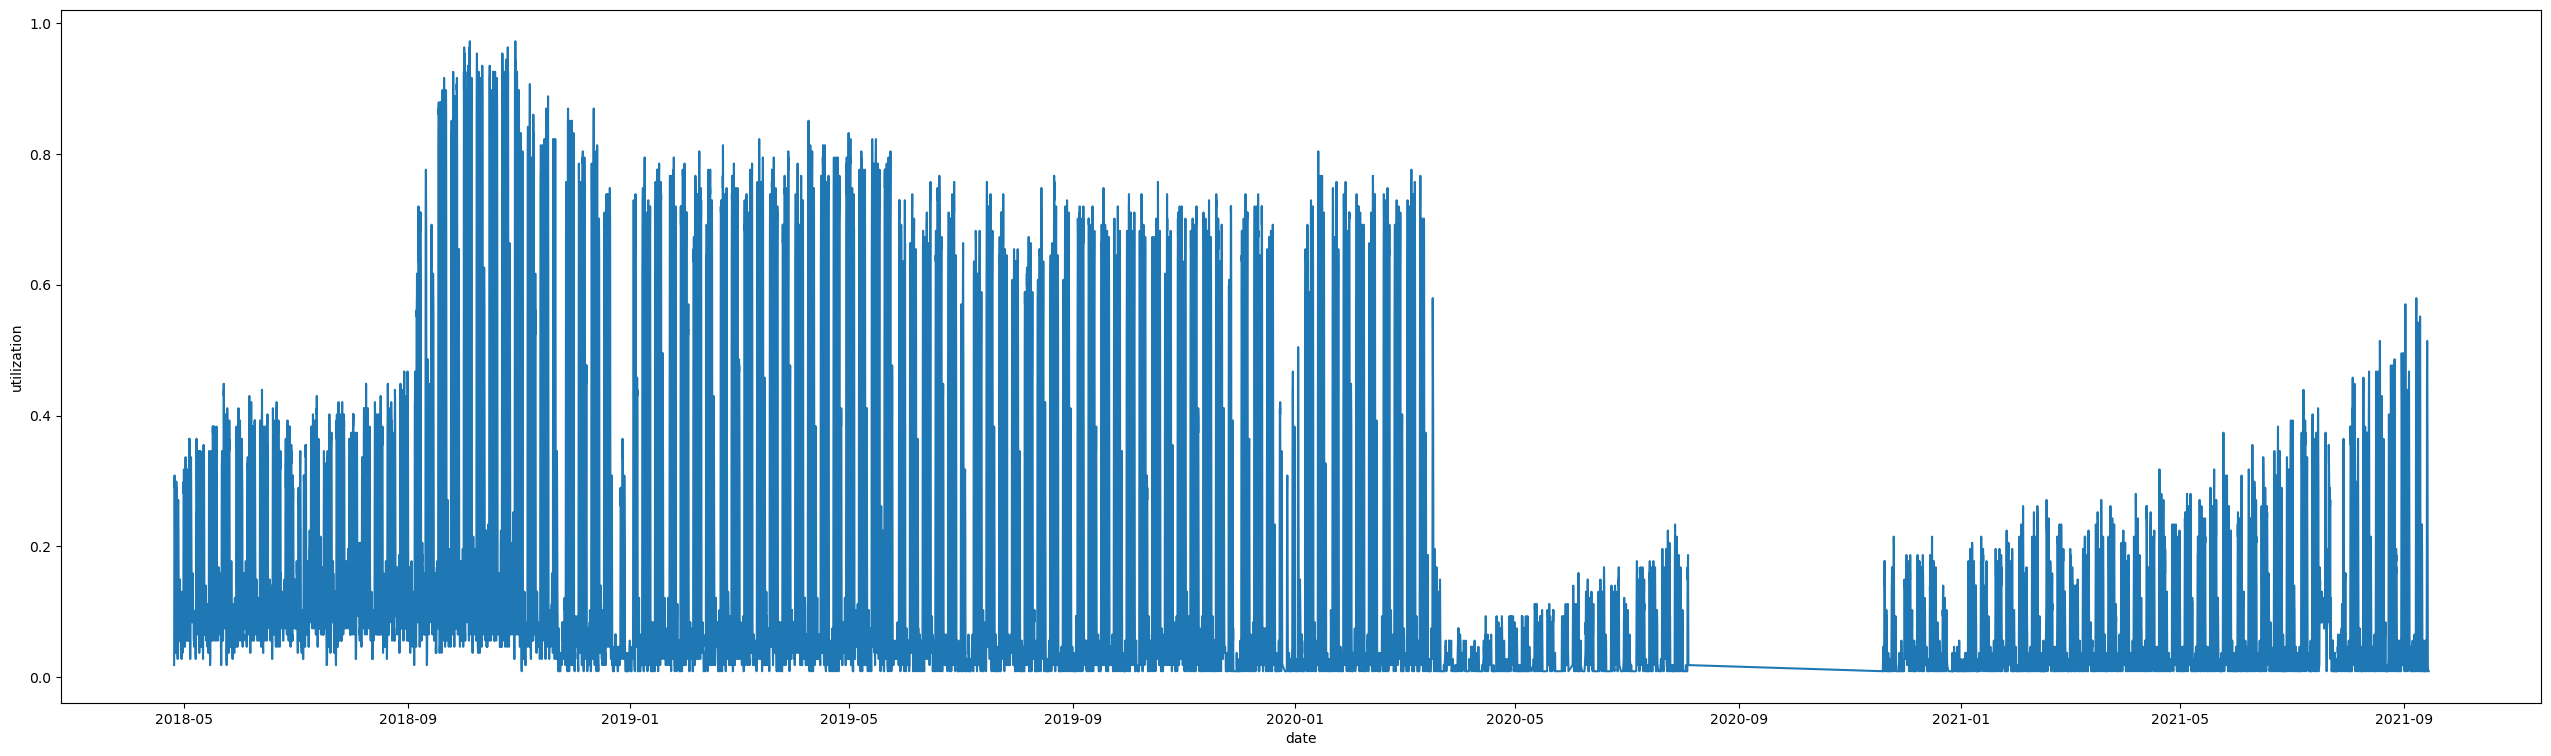

In [59]:
plt.figure(figsize=(32,9))
sns.lineplot(data=features, x="date", y="utilization")
plt.show()

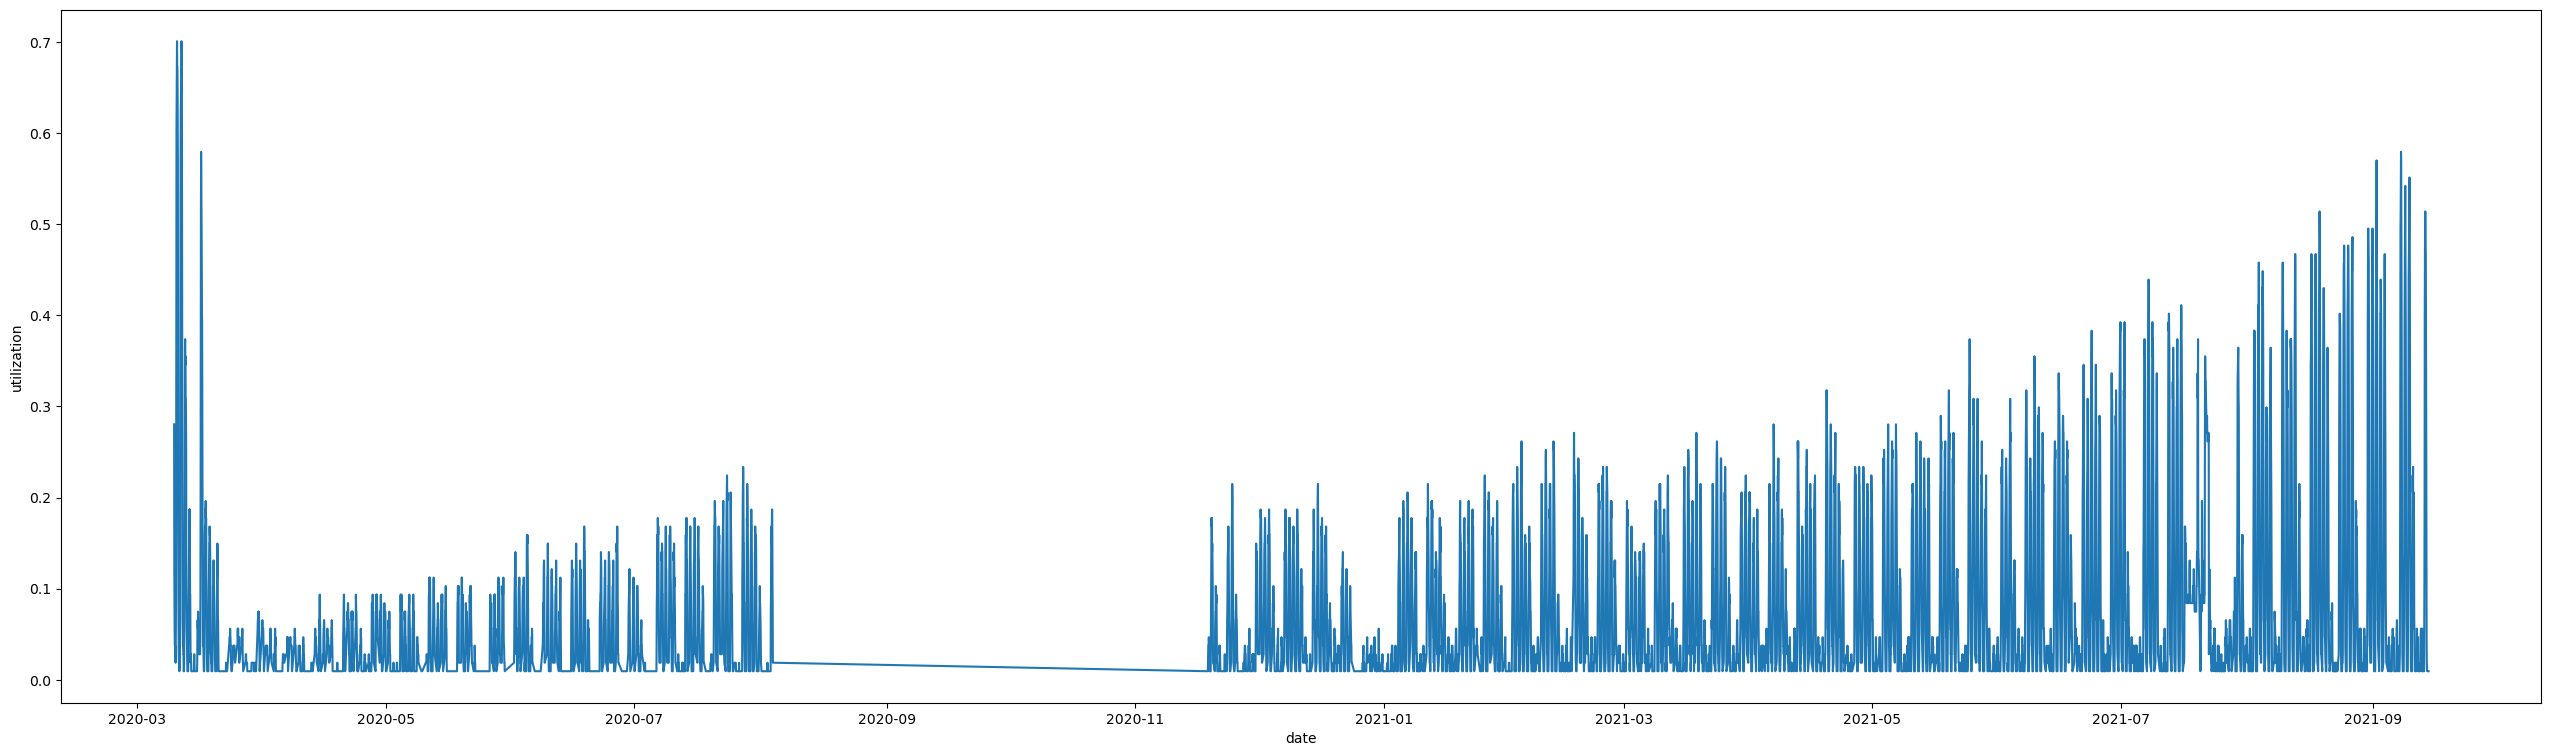

In [60]:
corona_features=features.loc[features["date"]> datetime.strptime("2020-03-10 00:00:00", "%Y-%m-%d %H:%M:%S")]
plt.figure(figsize=(32,9))
sns.lineplot(data=corona_features, x="date", y="utilization")
plt.show()

Newsom issued a mandatory statewide stay-at-home order was issued on March 19, 2020; it would be ended 10 months later, on January 25, 2021.  https://en.wikipedia.org/wiki/COVID-19_pandemic_in_California

The Operater may have should down the stations due to covid for economic reason

In [61]:
features["corona"]=features["date"].apply(lambda x: 1 if x > datetime.strptime("2020-03-10 00:00:00", "%Y-%m-%d %H:%M:%S") else 0)

### Encoding time series as cyclical features with sine and cosine transformation

In [62]:
features["hour_sin"]=np.sin(2 * np.pi * features["hour"] / features["hour"].max())
features["hour_cos"]=np.cos(2 * np.pi * features["hour"] / features["hour"].max())

features["weekday_sin"]=np.sin(2* np.pi * features["weekday"]/ features["weekday"].max())
features["weekday_cos"]=np.cos(2* np.pi * features["weekday"] / features["weekday"].max())

features["month_sin"]=np.sin(2* np.pi * features["month"]/ features["month"].max())
features["month_cos"]=np.cos(2* np.pi * features["month"]/ features["month"]. max())

In [63]:
print(features.head(4))

                 date  utilization  count_connect  count_disconnect  \
0 2018-04-25 13:00:00     0.018692            2.0               NaN   
1 2018-04-25 14:00:00     0.065421            5.0               NaN   
2 2018-04-25 15:00:00     0.196262           14.0               NaN   
3 2018-04-25 16:00:00     0.271028            8.0               NaN   

   temperature  precipitation  cloud_cover  weekday  hour  month  lagged_week  \
0         10.7            0.0          100        2    13      4     0.089195   
1         10.7            0.0          100        2    14      4     0.165501   
2         12.1            0.0           97        2    15      4     0.238959   
3         15.2            0.0           42        2    16      4     0.285926   

   lagged_hour  corona  hour_sin  hour_cos  weekday_sin  weekday_cos  \
0     0.000000       0 -0.398401 -0.917211     0.866025         -0.5   
1     0.018692       0 -0.631088 -0.775711     0.866025         -0.5   
2     0.065421       0

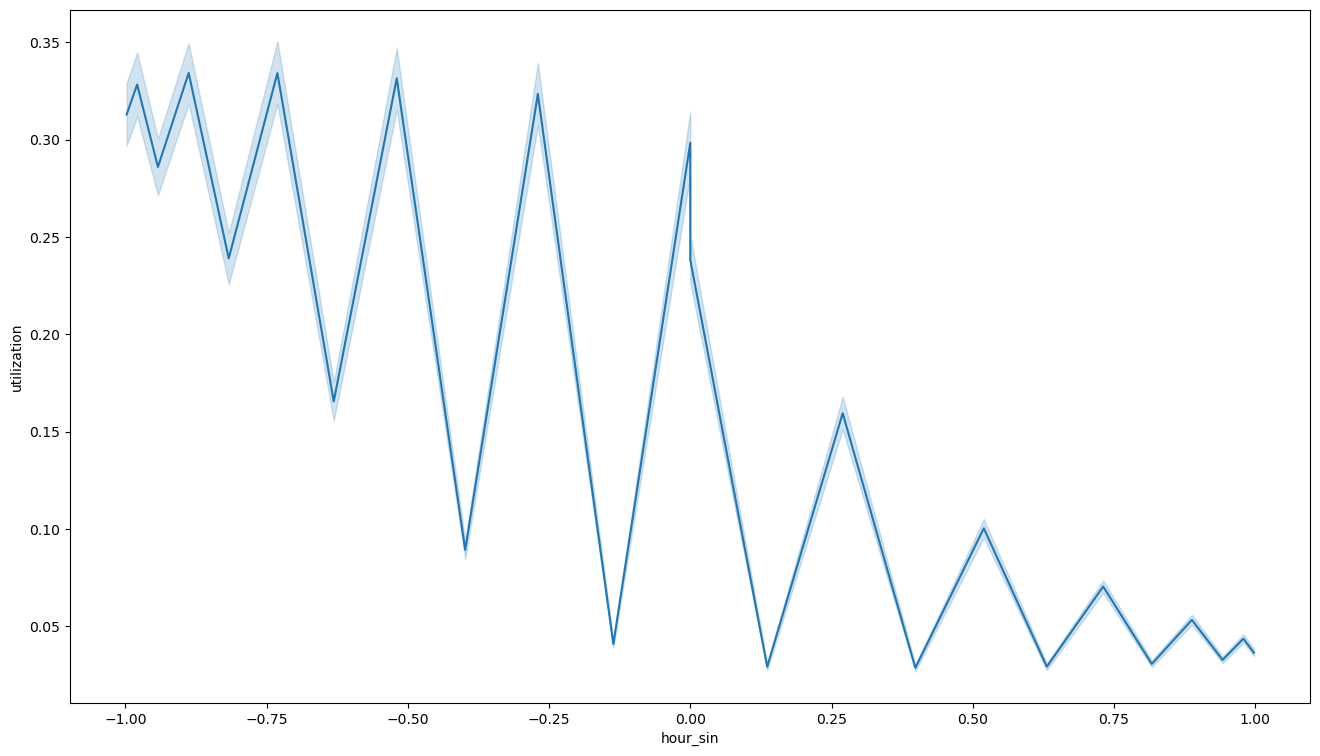

In [64]:
plt.figure(figsize=(16,9))
sns.lineplot(data=features, x="hour_sin", y="utilization")
plt.show()

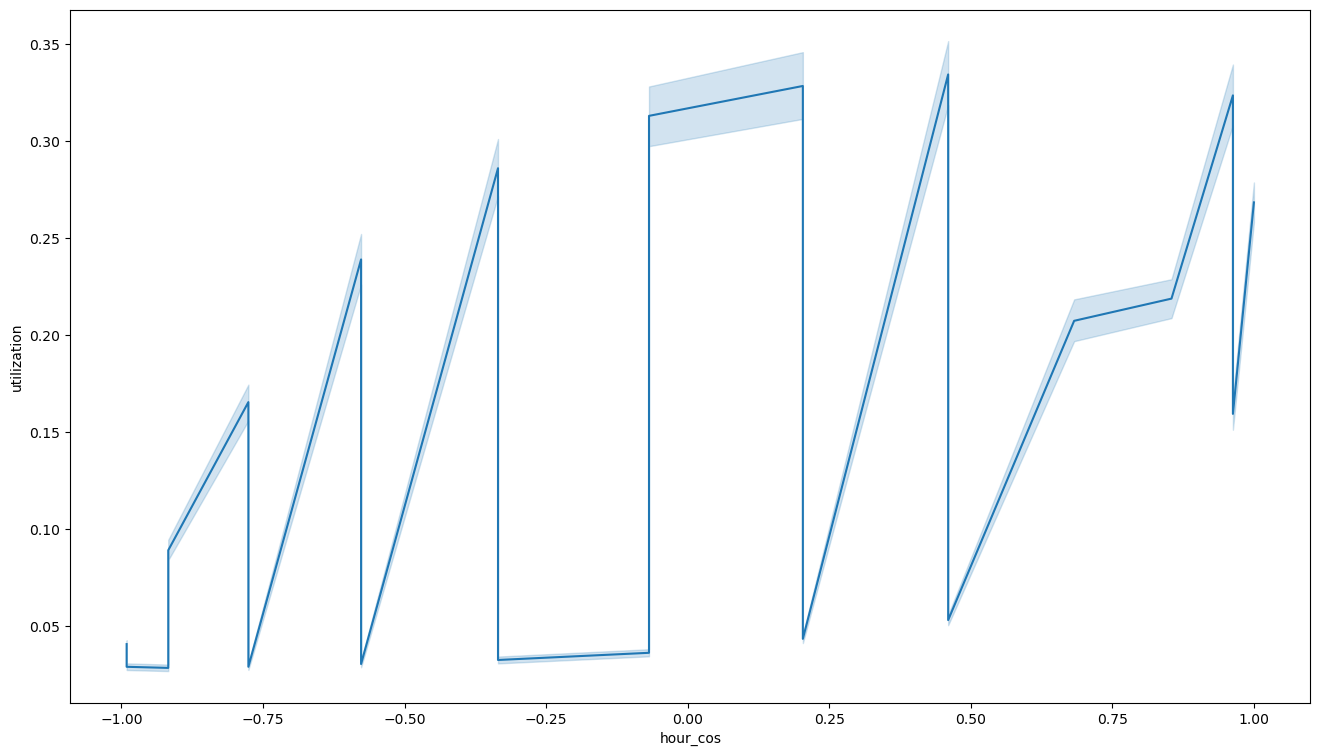

In [65]:
plt.figure(figsize=(16,9))
sns.lineplot(data=features, x="hour_cos", y="utilization")
plt.show()

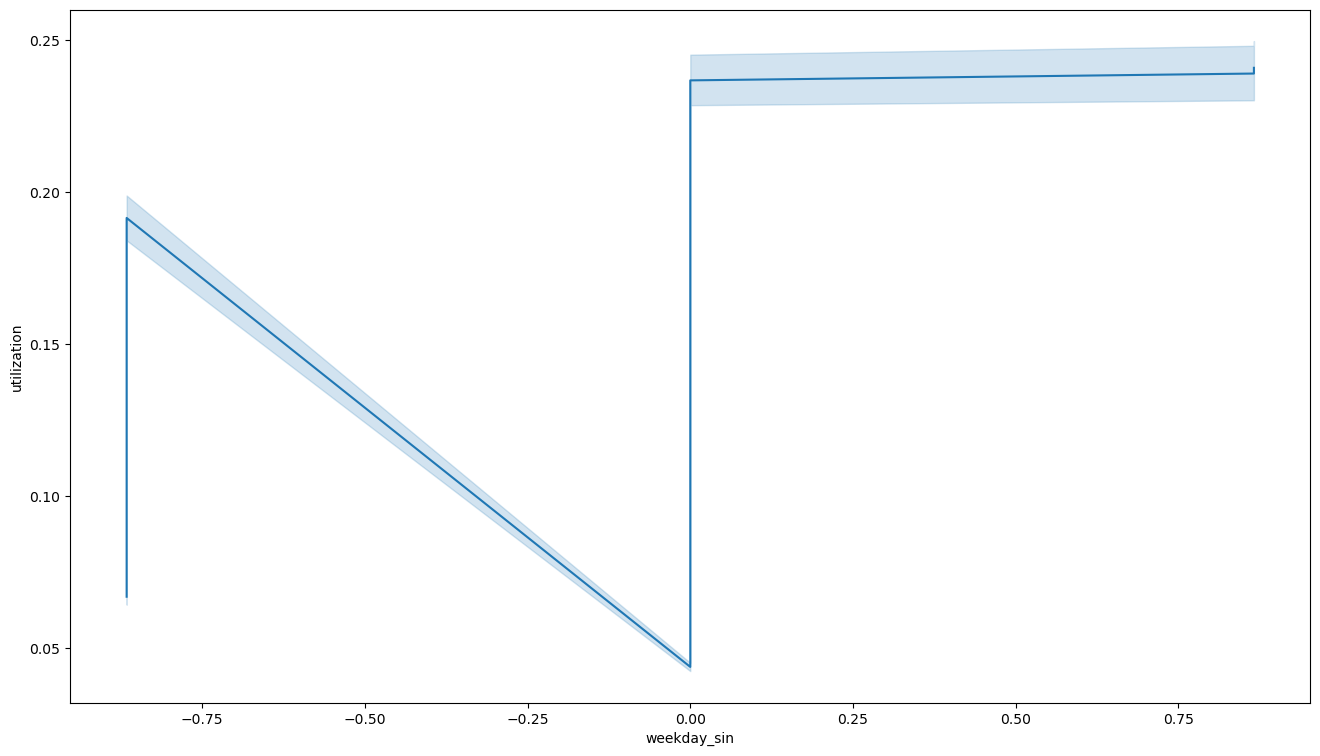

In [66]:
plt.figure(figsize=(16,9))
sns.lineplot(data=features, x="weekday_sin", y="utilization")
plt.show()

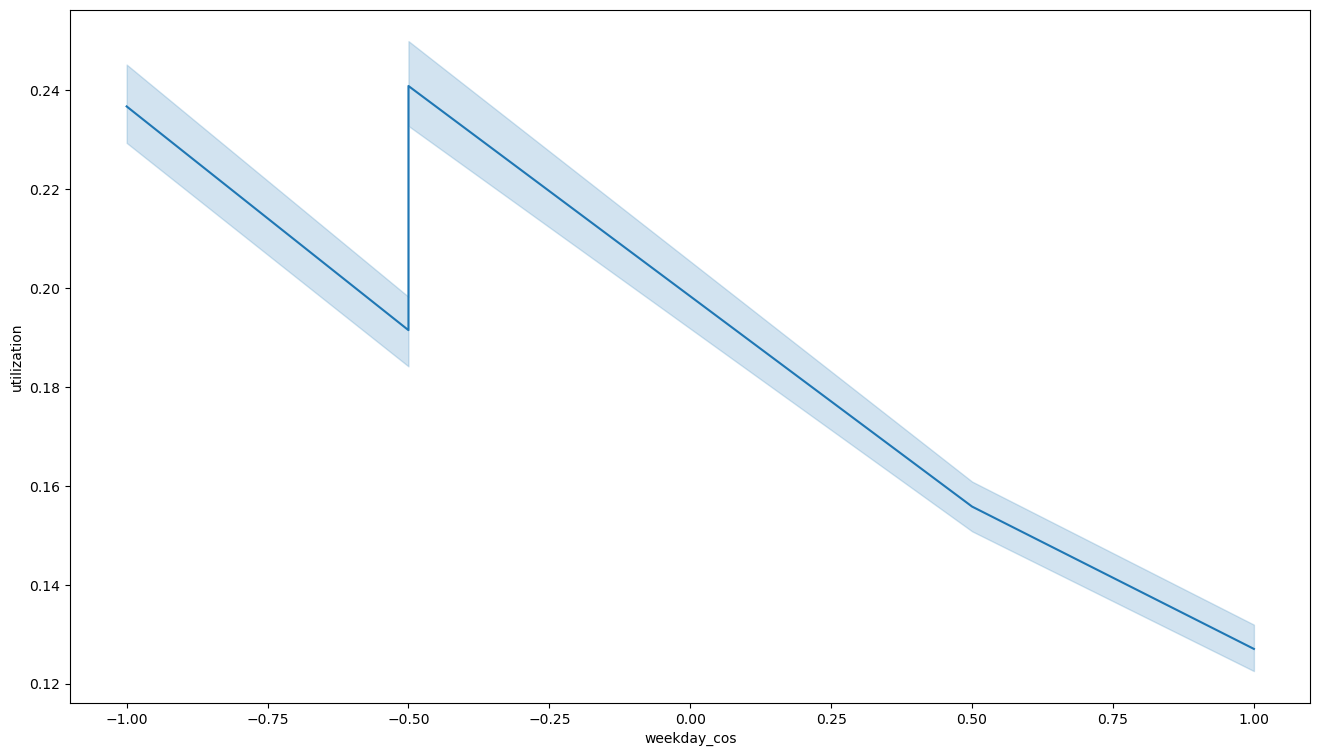

In [67]:
plt.figure(figsize=(16,9))
sns.lineplot(data=features, x="weekday_cos", y="utilization")
plt.show()

### Federal & School holiday

In [68]:
#https://www.public-holidays.us/US_EN_2021_California
holiday_dates = [
    "Monday, January 1, 2018",
    "Monday, January 15, 2018",
    "Sunday, February 4, 2018",
    "Monday, February 5, 2018",
    "Monday, February 19, 2018",
    "Friday, March 30, 2018",
    "Saturday, March 31, 2018",
    "Monday, May 28, 2018",
    "Tuesday, June 19, 2018",
    "Wednesday, July 4, 2018",
    "Monday, September 3, 2018",
    "Sunday, November 11, 2018",
    "Monday, November 12, 2018",
    "Thursday, November 22, 2018",
    "Tuesday, December 25, 2018",
    "Tuesday, January 1, 2019",
    "Monday, January 21, 2019",
    "Monday, February 4, 2019",
    "Monday, February 18, 2019",
    "Sunday, March 31, 2019",
    "Monday, April 1, 2019",
    "Monday, May 27, 2019",
    "Wednesday, June 19, 2019",
    "Thursday, July 4, 2019",
    "Monday, September 2, 2019",
    "Monday, November 11, 2019",
    "Thursday, November 28, 2019",
    "Wednesday, December 25, 2019",
    "Wednesday, January 1, 2020",
    "Monday, January 20, 2020",
    "Tuesday, February 4, 2020",
    "Monday, February 17, 2020",
    "Tuesday, March 31, 2020",
    "Monday, May 25, 2020",
    "Friday, June 19, 2020",
    "Friday, July 3, 2020",
    "Saturday, July 4, 2020",
    "Monday, September 7, 2020",
    "Wednesday, November 11, 2020",
    "Thursday, November 26, 2020",
    "Friday, December 25, 2020",
    "Friday, January 1, 2021",
    "Monday, January 18, 2021",
    "Thursday, February 4, 2021",
    "Monday, February 15, 2021",
    "Wednesday, March 31, 2021",
    "Monday, May 31, 2021",
    "Friday, June 18, 2021",
    "Saturday, June 19, 2021",
    "Sunday, July 4, 2021",
    "Monday, July 5, 2021",
    "Monday, September 6, 2021",
    "Thursday, November 11, 2021",
    "Thursday, November 25, 2021",
    "Friday, December 24, 2021",
    "Saturday, December 25, 2021",
    "Friday, December 31, 2021",
]

# Convert holiday dates to datetime objects
holiday_dates_datetime = [datetime.strptime(date_str, "%A, %B %d, %Y") for date_str in holiday_dates]
features['is_holiday'] = features['date'].apply(lambda x: 1 if x in holiday_dates_datetime else 0)

## Feature scaling & and split into training, test and validation data sets

In [128]:
features_raw=features.drop(["date", "count_connect", "count_disconnect", "hour", "weekday", "month"], axis=1)
#Y=features["utilization"]
print(features_raw.columns)
#X=features.drop(["utilization"], axis=1)

AttributeError: 'list' object has no attribute 'drop'

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=21)

#create validation, test and train data set
X_training, X_validation, Y_training, Y_validation=train_test_split(X_train, Y_train, test_size=0.2, random_state=21)

In [147]:
def train_model(features, model):

    kfold= KFold(n_splits=5, random_state=47, shuffle=True)
    Scaler=StandardScaler()
    
    Y=features_raw["utilization"]
    X=features_raw[features]

    X=Scaler.fit_transform(X)
    Y=Scaler.fit_transform(Y.values.reshape(-1, 1))

    list_r2=[]
    list_MAE=[]
    list_MSE=[]
    
    for train_index, validation_index in kfold.split(X,Y):

        X_train=X[train_index]
        Y_train=Y[train_index]

        X_val=X[validation_index]
        Y_val=Y[validation_index]
        
        model.fit(X_train, Y_train)
        pred=model.predict(X_val)

        r2=r2_score(Y_val, pred)
        MAE= mean_absolute_error(Y_val, pred)
        MSE= mean_squared_error(Y_val, pred)

        list_r2.append(r2)
        list_MSE.append(MSE)
        list_MAE.append(MAE)

    print(f"average r2 score is {sum(list_r2)/len(list_r2)}")
    print(f"average MSE score is {sum(list_MSE)/len(list_MSE)}")
    print(f"average MAE score is {sum(list_MAE)/len(list_MAE)}")
        
        

## Train prediction models

### Mutliple linear regression

features=['temperature', 'precipitation', 'cloud_cover',
       'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', 'is_holiday'
         ]

In [139]:
model_linear_regression=LinearRegression()
features=['temperature',  
       'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'
         ]
train_model(features, model_linear_regression)
print(model_linear_regression.coef_)

average r2 score is 0.9575140986866637
average MSE score is 0.04246311115310264
average MAE score is 0.13983678297109925
[[-4.12708221e-03  1.46391046e-01  8.44164532e-01 -6.52825837e-03
  -8.54985286e-02 -9.55474317e-02  1.25290327e-02  6.61743590e-03
  -3.21070078e-03 -2.57280889e-04]]


### Polynomial regression

In [140]:
model_poly_reg=LinearRegression()

In [160]:
    features=['temperature',  
       'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'
         ]
    kfold= KFold(n_splits=5, random_state=47, shuffle=True)
    Scaler=StandardScaler()
    
    Y=features_raw["utilization"]
    X=features_raw[features]

    X=Scaler.fit_transform(X)
    Y=Scaler.fit_transform(Y.values.reshape(-1, 1))

    poly_feat= PolynomialFeatures(degree=3)
    X= poly_feat.fit_transform(X)


    list_r2=[]
    list_MAE=[]
    list_MSE=[]
    
    for train_index, validation_index in kfold.split(X,Y):

        X_train=X[train_index]
        Y_train=Y[train_index]

        X_val=X[validation_index]
        Y_val=Y[validation_index]
        
        model_poly_reg.fit(X_train, Y_train)
        pred=model_poly_reg.predict(X_val)

        r2=r2_score(Y_val, pred)
        MAE= mean_absolute_error(Y_val, pred)
        MSE= mean_squared_error(Y_val, pred)

        list_r2.append(r2)
        list_MSE.append(MSE)
        list_MAE.append(MAE)

    print(f"average r2 score is {sum(list_r2)/len(list_r2)}")
    print(f"average MSE score is {sum(list_MSE)/len(list_MSE)}")
    print(f"average MAE score is {sum(list_MAE)/len(list_MAE)}")

average r2 score is 0.9839265532933388
average MSE score is 0.01606761962030922
average MAE score is 0.08434446849605762


### Decision Tree

In [144]:
dc_tree=tree.DecisionTreeRegressor(max_depth=3)

features=['temperature', 'precipitation', 'cloud_cover', 'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos', 'weekday_sin', 
          'weekday_cos', 'month_sin', 'month_cos', 'is_holiday' ]
train_model(features, dc_tree)

average r2 score is 0.931591014565389
average MSE score is 0.06839093549871021
average MAE score is 0.1732507329912425


### Random forest

In [157]:
random_forest=RandomForestRegressor(random_state=21)

features=['temperature', 'precipitation', 'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos', 'weekday_sin', 
          'weekday_cos', 'month_sin', 'month_cos', 'is_holiday' ]
train_model(features, random_forest)

average r2 score is 0.9884242564814285
average MSE score is 0.011570466266237556
average MAE score is 0.06795609404743908


### XGBoost

In [156]:
xgb_model=xgb.XGBRegressor(random_state=21)

features=['temperature', 'precipitation', 'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos', 'weekday_sin', 
          'weekday_cos', 'month_sin', 'month_cos', 'is_holiday']
train_model(features, xgb_model)

average r2 score is 0.9884133808963333
average MSE score is 0.011586299864238576
average MAE score is 0.06910834930984514


### Neural Network

In [169]:
    features=['temperature',  
       'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'
         ]

model = Sequential()
model.add(Dense(12, input_shape=(len(features),), activation='relu')) #first hidden layer
model.add(Dense(8, activation='relu')) #second hidden layer
model.add(Dense(1)) #outpout layer

model.compile(loss='mean_squared_error', optimizer='adam')

In [171]:
    kfold= KFold(n_splits=5, random_state=47, shuffle=True)
    Scaler=StandardScaler()
    
    Y=features_raw["utilization"]
    X=features_raw[features]

    X=Scaler.fit_transform(X)
    Y=Scaler.fit_transform(Y.values.reshape(-1, 1))



    list_r2=[]
    list_MAE=[]
    list_MSE=[]
    
    for train_index, validation_index in kfold.split(X,Y):

        X_train=X[train_index]
        Y_train=Y[train_index]

        X_val=X[validation_index]
        Y_val=Y[validation_index]
        
        model.fit(X, Y, epochs=150, batch_size=10)
        pred=model.predict(X_val)

        r2=r2_score(Y_val, pred)
        MAE= mean_absolute_error(Y_val, pred)
        MSE= mean_squared_error(Y_val, pred)

        list_r2.append(r2)
        list_MSE.append(MSE)
        list_MAE.append(MAE)

    print(f"average r2 score is {sum(list_r2)/len(list_r2)}")
    print(f"average MSE score is {sum(list_MSE)/len(list_MSE)}")
    print(f"average MAE score is {sum(list_MAE)/len(list_MAE)}")

Epoch 1/150
2371/2371 [==============================] - 4s 915us/step - loss: 0.0922
Epoch 2/150
2371/2371 [==============================] - 2s 880us/step - loss: 0.0291
Epoch 3/150
2371/2371 [==============================] - 2s 885us/step - loss: 0.0248
Epoch 4/150
2371/2371 [==============================] - 2s 894us/step - loss: 0.0204
Epoch 5/150
2371/2371 [==============================] - 2s 889us/step - loss: 0.0172
Epoch 6/150
2371/2371 [==============================] - 2s 889us/step - loss: 0.0161
Epoch 7/150
2371/2371 [==============================] - 2s 910us/step - loss: 0.0155
Epoch 8/150
2371/2371 [==============================] - 3s 1ms/step - loss: 0.0151
Epoch 9/150
2371/2371 [==============================] - 2s 995us/step - loss: 0.0149
Epoch 10/150
2371/2371 [==============================] - 2s 913us/step - loss: 0.0147
Epoch 11/150
2371/2371 [==============================] - 2s 917us/step - loss: 0.0144
Epoch 12/150
2371/2371 [==============================

### Feature importance and prediction interpretation

In [235]:
features=['temperature', 'precipitation', 'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos', 'weekday_sin', 
          'weekday_cos', 'month_sin', 'month_cos', 'is_holiday']

X=features_raw[features]
X=Scaler.fit_transform(X)
explainer_xgb = shap.KernelExplainer(xgb_model.predict, X[:100])
shap_values = explainer_xgb.shap_values(X[8])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X[8], feature_names=features)

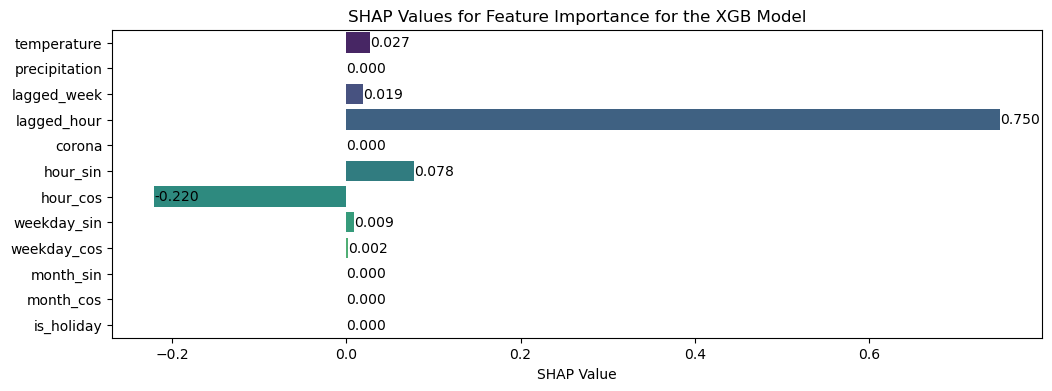

In [236]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=shap_values, y=features, palette='viridis')

for i, value in enumerate(shap_values):
    ax.text(value, i, f'{value:.3f}', ha='left', va='center', fontsize=10, color='black')

plt.xlabel('SHAP Value')
plt.title('SHAP Values for Feature Importance for the XGB Model')
plt.show()

In [241]:
    features=['temperature',  
       'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']

X=features_raw[features]
X=Scaler.fit_transform(X)
explainer_nn = shap.KernelExplainer(model.predict, X[:100])
shap_values = explainer_nn.shap_values(X[8])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X[8], feature_names=features)

394/394 [==============================] - 0s 755us/step


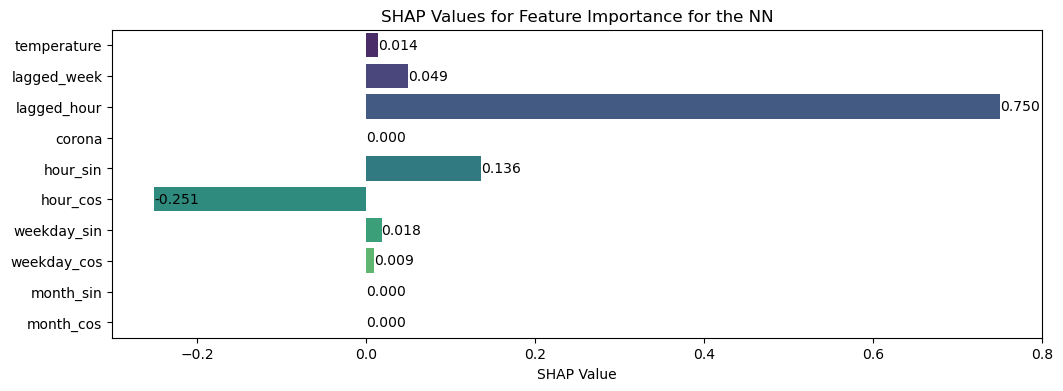

In [234]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=shap_values[0], y=features, palette='viridis')

for i, value in enumerate(shap_values[0]):
    ax.text(value, i, f'{value:.3f}', ha='left', va='center', fontsize=10, color='black')

plt.xlabel('SHAP Value')
plt.title('SHAP Values for Feature Importance for the NN')
plt.show()

In [238]:
features=['temperature',  
       'lagged_week', 'lagged_hour', 'corona', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'
         ]

X=features_raw[features]
X=Scaler.fit_transform(X)
explainer_linear_regression = shap.KernelExplainer(model_linear_regression.predict, X[:100])
shap_values = explainer_linear_regression.shap_values(X[8])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X[8], feature_names=features)


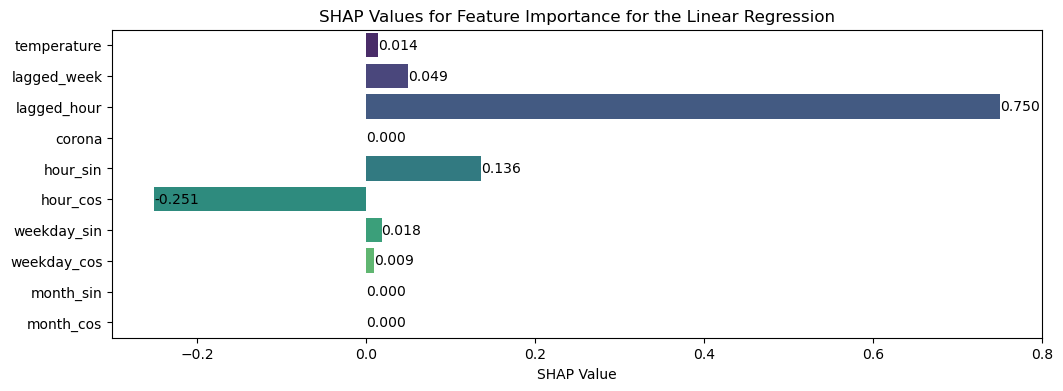

In [242]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=shap_values[0], y=features, palette='viridis')

for i, value in enumerate(shap_values[0]):
    ax.text(value, i, f'{value:.3f}', ha='left', va='center', fontsize=10, color='black')

plt.xlabel('SHAP Value')
plt.title('SHAP Values for Feature Importance for the Linear Regression')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 23710/23710 [1:30:00<00:00,  4.39it/s]


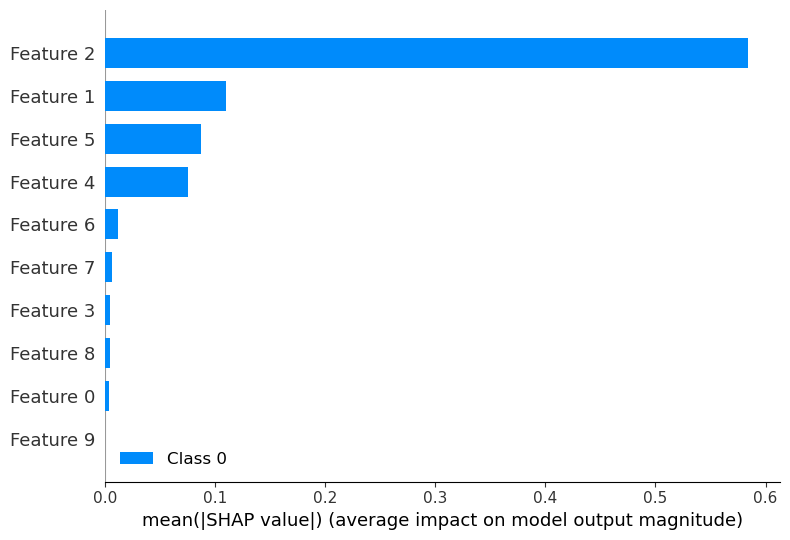

In [243]:
shap_values = explainer_linear_regression.shap_values(X)
shap.summary_plot(shap_values, X)